# Исследование рынка заведений общественного питания города Москва

- Автор:Калачева А.В.
- Дата:21.01.2025 г.

### Цели и задачи проекта
**Цель:** Провести исследовательский анализ рынка общественного питания города Москва с целью выбора по итогам проведенной работы подходящего инвестора.

  **Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить категории заведений;
    - изучить районы распределения заведений;
    - изучить соотношение сетевых и несетевых заведений;
    - исследовать заведения по количеству посадочных мест;
    - исследовать рейтинги заведений;
    - изучить категории заведений;
    - выявить взаимосвязь рейтинга с данными о заведениях;
    - выявить топ-15 заведений;
    - исследовать средний чек (столбец `middle_avg_bill`) по районам распределения заведений.
4. Сформулировать итоговый вывод и рекомендации по проведённому анализу.


### Описание данных

**Данные**

Для анализа поступили данные о заведениях.Данные состоят из двух датсетов:
   - /datasets/rest_info.csv - информация о заведениях общественного питания; 
   - /datasets/rest_price.csv - информация о среднем чеке заведений общественного питания. 
   
**Описание датасета rest_info.csv**

  - `name` — название заведения;
  - `address` — адрес заведения;
  - `distric`t — административный район, в котором находится заведение, например Центральный административный округ;
  - `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
  - `hours` — информация о днях и часах работы;
  - `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
  - `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
        0 — заведение не является сетевым;
        1 — заведение является сетевым.
  - `seats` — количество посадочных мест.
  
  
  **Описание датасета rest_price.csv**
  
  - `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
  - `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
       «Средний счёт: 1000–1500 ₽»;
       «Цена чашки капучино: 130–220 ₽»;
       «Цена бокала пива: 400–600 ₽».
       и так далее;
  - `middle_avg_bil`l — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с            подстроки «Средний счёт»:
  
       Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
       
       Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
       
       Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
       
       
  - `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill,                  начинающихся с подстроки «Цена одной чашки капучино»:
  
       Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
       
       Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
       
       Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik -U

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
#!conda install conda-forge::phik
#!pip install phik 
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные rest_df и rest_price_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

Познакомимся с данными датасета `/datasets/rest_info.csv` -выведем первые строки методом head(), а информацию о датафрейме методом info():

In [4]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info` собержит 9 столбцов и 8406 строк, в которых предоставлена информация о заведениях общепита города Москва.

После первичного анализа данных можно сделать следующие выводы:
  - Названия столбцов представлены в стиле snake case.
- **Числовые значения с плавающей запятой (float64).** Два столбца имеют тип `float64`. Для столбцов `rating`, `seats` - это верное решение, так как данные могут быть дробными значениями, но можно оптимизировать формат с помощью функции `to_numeric()` с парпметром `downcast`. 
- **Целочисленные значения (int64).** Один столбец имеет тип `int64`- это верное решение, так как данные с бинарными значениями, их можно оптимизировать с помощью функции `to_numeric()` с парпметром `downcast`. 
- **Строковые данные (object).** Шесть столбцов имеют тип данных `object`:
   `id`, `name`, `category`, `address`, `district` и `hours` содержат строковую информацию (индификатор, название, адрес, район нахождения, категория и режим работы заведения), что логично для текстовых данных. 
   - Пропуски содержаться в столбцах `hours` и `seats`.


Теперь познакомимся с данными датасета `/datasets/rest_price.csv`

In [6]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_info` собержит 5 столбцов и 4058 строк, в который содержит информация о среднем чеке в заведениях общепита города Москва. По примеру с предыдущем датасетом можно отметить что:

- Названия столбцов представлены в стиле snake case.
 - **Числовые значения с плавающей запятой (float64).** Два столбца имеют тип `float64`. Для столбцов `middle_avg_bill`, `middle_coffee_cup` - это верное решение, так как данные могут быть дробными значениями, но можно оптимизировать формат с помощью функции `to_numeric()` с парпметром `downcast`. 
 - **Строковые данные (object).** Три столбца имеют тип данных `object`:
   `id`, `price`и `avg_bill` содержат строковую информацию (идентификатор заведения,тип цен и средняя цена в виде диапазона), что логично для текстовых данных. 
- Пропуски содержаться во всех столбцах датасета кроме столбца `id`.


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Были представлена информация по заведениям общепита г. Москва в двух датасетах:
  - `/datasets/rest_info.csv` (собержит 9 столбцов и 8406 строк, в которых предоставлена информация о заведениях общепита города Москва);
  - `/datasets/rest_price.csv`(собержит 5 столбцов и 4058 строк, в который содержит информация о среднем чеке в заведениях общепита города Москва).
  
  После первичного просмотра данных можно отметить положительным, что все названия столбцов представлены в стиле `snake case`, форматы данных в двух датасетах соответствуют содержимому, можно будет только оптимизировать размер, для сокращения объема памяти. Однако заметили, что не был указан в описании столбец с индификатором заведений `id`, который будем использовать при формировании единого датафрейма. Пропуски  содержатся в датасете `/datasets/rest_info.csv` только в двух столбцах из девяти - это столбцы `hours` и `seats`, а в датасете `/datasets/rest_price.csv` пропуски в четырех столбцах из пяти кроме `id`, что потребует детального исследования причин и возможности замены пропусков. 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

Соеденим данные двух датафреймов `rest_df` и `rest_price_df`  с информацией по заведениям общепита города Москва, для удобства анализа. Соединять будем по индификатору заведения(столбец `id`) методом `merge`, используя параметр `how='left'`, так основные данные указаны в первом датасете и по ним проводится основной анализ, то из второго датасета получим данные которые уже имеем в первом.

In [8]:
# Соединяем данные в единый датафрейм df
df = rest_df.merge(rest_price_df, on='id', how='left')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [10]:
# Выводим первые строки датафрейма на экран
df.head(50)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,NaN
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

Ранее проверили тип данных на корректность, поэтому понадобится провести только их оптимизацию с целочисленным значением и значениями с плавающей точкой.

In [11]:
# Сохраняем новый датафрейм для преобразования данных в столбцах 
df_new_type=df.copy()

In [12]:
# C помощью цикла указанные столбцы датафрейма поочередно преобразуем c оптимизацией формат  float, и оптимизируем формат integer столбца chain  
for column in ['rating','seats','middle_avg_bill','middle_coffee_cup']:
    df_new_type[column]=pd.to_numeric(df_new_type[column],downcast='float')
df_new_type['chain']=pd.to_numeric(df_new_type['chain'],downcast='integer')
df_new_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB


Вывели информацию о датафрейме и убедились, что данные в столбцах были успешно оптимизированы с понижением размерности целочисленных данных и данных с плавающей точкой, позволив сократить объем хранимых данных..

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [13]:
# Выводим количество пропущенных строк в датафрейме в абсолютном выражении
# Рассчитываем количество пропущенных значений в абсолютном выражении
missing_isna =df_new_type.isna().sum()
# Сортируем результаты по величине пропусков, в порядке убывания
sorted_isna = missing_isna.sort_values(ascending=False)
# Выводим отсортированные данные
print(sorted_isna)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64


In [14]:
# Выводим количество пропущенных строк в датафрейме в относительном выражении
# Рассчитываем процент пропущенных значений в относительном выражении
missing_percentage = round(df_new_type.isna().sum()/len(df_new_type) * 100, 2)

# Сортируем результаты по величине пропусков, в порядке убывания
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Выводим отсортированные данные
print(sorted_missing_percentage)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64


В данных наблюдаются пропуски в следующих столбцах:

- `hours`: в 536 строках (6.38% данных) отсутствует информация о режиме работы заведения. Удаление пропусков может повлиять на анализ данных, поэтому не будем удалять пропуски в этом столбце, заменим пропуски на `no_hours`. Скорее всего пропуски в этом столбце можно отнести к типу `MCAR`, возможно произошел сбой при сборе данных или просто они не были добавлены в общедоступный источник.
- `seats`: в 3611 строках (42.96% данных) отсутствует информация о количестве посадочных мест. Пропуски в этом столбце могли бы повлиять на анализ данных,поэтому логично заменить пропуски на значение индикатор(-1).Пропуски могли возникнуть в этом столбце по нескольким причинам:
   - категория заведения не предусматривает посадочные места;
   - произошел сбой при обработке и загрузке данных;
   - данные о заведении не были добавлены в общедоступный источник.
- `price`: в 5091 строках (60.56% данных) отсутствует информация о категории цен. Пропуски в этом столбце могли бы повлиять на анализ данных, так как процент пропусков большой, но даные по этому столбцу не являются основными для анализа, то  логично заменить пропуски на значение `no_price`. Пропуски могли возникнуть в этом столбце по нескольким причинам:
   - возможно данные по цене не попадают ни в одну из категорий;
   - произошел сбой при обработке и загрузке данных;
   - данные о заведении не были добавлены в общедоступный источник.
- `avg_bill`: в 4590 строках (54.60% данных) отсутствуют данные о средней цене чека представленных диапазоном. Процент пропусков значительный и может существенно исказить анализ данных.Поэтому аналогично предыдущему столбцу с категорией цен, просто заменим пропуски на `no_avg_bill`. Вероятно пропуски возникли случайным образом, могли забыть внести информацию о продаже и гипотезы возникновения актуальны как и для предыдущих столбцов.
- `middle_avg_bill`: в 5257 строках (62.54% данных) отсутствуют данные об оценки среднего чека. Процент пропусков тоже очень существенный, строки конечно удалять не будем. Заменим их на значения инднкатор(-1). В описании данных к этому столбцу уже есть предположение о возможности появления пропусков, если в столбце  `avg_bill` занчение не начинается с продстроки `"Средний счет"`, то данные априори будут отсутствовать, остальные причины пропусков актуальны, что мы описывали для предыдущих столбцов.
- `middle_coffee_cup`: в 7871 строках (93.64% данных) отсутствуют данные о средней оценке чека за чашку кофе. Количество пропусков очень велико, но это логично по назначению данных которые представленны по определенному продукту в чеке. Поэтому заменим пропуски на значение индикатор(-1). 

In [15]:
# Сохраняем новый датафрейм для дальнейше работы с заменой пропусков в данных 
df_fillna_new=df_new_type.copy()

In [16]:
# Произведем замены на значения индикатор(-1) и выведем первые пять строк датафрейма для проверки 
for column in ['seats','middle_avg_bill', 'middle_coffee_cup']:
    df_fillna_new[column]=df_fillna_new[column].fillna(-1)
df_fillna_new.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,NaN,NaN,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,NaN,Цена чашки капучино:155–185 ₽,-1.0,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0


In [17]:
# В столбцах заменим пропуски на выбранные занчения и выведем первые строки для проверки
# Создадим список с значениями которыми будем заполнять для каждого столбца
values = {'hours':'no_hours','price':'no_price','avg_bill':'no_avg_bill'}
df_fillna_new.fillna(value=values, inplace=True)
df_fillna_new.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,no_price,no_avg_bill,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,no_price,Цена чашки капучино:155–185 ₽,-1.0,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0


In [18]:
# Проверим все ли пропуски были заполнены, посчитав их количество в абсолютном выражении
df_fillna_new.isna().sum()

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64

Вывели данные с суммой пропусков по датафрейму и убедились, что все пропуски заполнены.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [19]:
# Сохраняем новый датафрейм для дальнейше работы при замене дубликатов в данных 
df_unique_new=df_fillna_new.copy()

In [20]:
# Выведем названия столбцов с категориальными данными и посчитаем количество уникальных значений
unique_name=df_fillna_new['name'].unique()
unique_name_count=df_fillna_new['name'].nunique()
unique_address=df_fillna_new['address'].unique()
unique_address_count=df_fillna_new['address'].nunique()
unique_district=df_fillna_new['district'].unique()
unique_district_count=df_fillna_new['district'].nunique()
unique_category=df_fillna_new['category'].unique()
unique_category_count=df_fillna_new['category'].nunique()
unique_hours=df_fillna_new['hours'].unique()
unique_hours_count=df_fillna_new['hours'].nunique()
unique_price=df_fillna_new['price'].unique()
unique_price_count=df_fillna_new['price'].nunique()
print(unique_name,unique_name_count,'\n',unique_address,unique_address_count,'\n', unique_district,unique_district_count,'\n',unique_category,unique_category_count,'\n',unique_hours,unique_hours_count,'\n',unique_price,unique_price_count)

['WoWфли' 'Четыре комнаты' 'Хазри' ... 'Миславнес' 'Самовар' 'Kebab Time'] 5614 
 ['Москва, улица Дыбенко, 7/1' 'Москва, улица Дыбенко, 36, корп. 1'
 'Москва, Клязьминская улица, 15' ...
 'Москва, улица Лобачевского, 52, корп. 1'
 'Москва, Болотниковская улица, 52, корп. 2'
 'Москва, Чонгарский бульвар, 26А, корп. 1'] 5753 
 ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ'] 9 
 ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая'] 8 
 ['ежедневно, 10:00–22:00'
 'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00'
 'ежедневно, 09:00–22:00' ... 'пн-пт 08:30–21:30; сб,вс 09:00–21:30'
 'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00'
 'пн-сб 10:30–21:30'] 1308 


Проверяем столбцы с категориальными данными на наличие неявных дубликатов,и заметили, что названия в столбцах `name`и `address` могут быть неявные дубликаты обоснованные написанием в разных регистрах, приведем данные в этих столбцах к верхнему регистру написания. В столбцах `district`,`category` и `price` с районом, категорией заведения и среднего чека, значений немного и видно, что дубликатов нет. Данные с режимом работы оставим без преобразования.

In [21]:
df_unique_new[['name','address']] = df_unique_new[['name','address']].apply(lambda x: x.str.strip().str.upper().str.replace(' ', '_'))
df_unique_new.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА,_УЛИЦА_ДЫБЕНКО,_7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,no_price,no_avg_bill,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ_КОМНАТЫ,ресторан,"МОСКВА,_УЛИЦА_ДЫБЕНКО,_36,_КОРП._1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE_COFFEE_SHOP,кофейня,"МОСКВА,_УЛИЦА_МАРШАЛА_ФЕДОРЕНКО,_12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,no_price,Цена чашки капучино:155–185 ₽,-1.0,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ_МАРКО,пиццерия,"МОСКВА,_ПРАВОБЕРЕЖНАЯ_УЛИЦА,_1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0


После вывода первых строк дата фрейма можем посмотреть, что названия поменяли свой регистр и приведены к одному стилю. Теперь можем посчитать снова количество уникальных значений в этих стобцах, чтобы убедиться в избавлении неявных дубликатов.

In [22]:
# Проверим гипотезу о неявных дубликатах и выведем количество уникальных значений после преобразования названий и количество неявных дубликатов
unique_name_address_count=df_unique_new[['name','address']].nunique()
print(f"Количество уникальных значений после преобразованных неявных дубликатов:\n{unique_name_address_count}")
print(f"Количество выявленных неявных дубликатов:\n{df_fillna_new[['name','address']].nunique()-unique_name_address_count}")

Количество уникальных значений после преобразованных неявных дубликатов:
name       5512
address    5752
dtype: int64
Количество выявленных неявных дубликатов:
name       102
address      1
dtype: int64


Проверяем гипотезу о неявных дубликатах после преобразования названий к единому стилю в `name`,`address`. Замечаем, что количество уникальных значений поменялось в `name` было 5614, после преобразования стало 5512, количество неявных дубликатов равно 102, по `address` выявили всего 1 дубликат.

In [23]:
# Сoхраняем количество строк до удаления дубликатов
initial_row_count=df_unique_new.shape[0]
# Находим явные дубликаты
duplicates = df_unique_new.duplicated().sum()
print(f"Количество дубликатов:{duplicates}")

Количество дубликатов:0


In [24]:
# Находим явные дубликаты по совпадению в двух столбцах name и address
duplicates_2 = df_unique_new[['name', 'address']].duplicated().sum()
# Удаляем явные дубликаты
df_unique_new_2 = df_unique_new.drop_duplicates(subset=['name', 'address'], keep='first')
# Сoхраняем количество строк после удаления дубликатов
final_row_count=df_unique_new_2.shape[0]
print(f"Количество дубликатов:{duplicates_2}")
print(f"Количество строк до удаления дубликатов:{initial_row_count}")
print(f"Количество строк после удаления дубликатов:{final_row_count}")

Количество дубликатов:4
Количество строк до удаления дубликатов:8406
Количество строк после удаления дубликатов:8402


In [25]:
df_unique_new_2=df_unique_new.copy()

Изучим данные после выявления дубликатов и их удаления:
- **Неявные дубликаты** В шести столбцах с категориальными данными `name`,`address`,`district`, `category`, `hours` и `price`проверили уникальные значения и только в двух `name`и `address`произвели преобразования названия, приведя их к единому стилю. После преобразования посчитали еще раз уникальные значения и в `name` количество изменилось на 102, а в `address` всего на одно значение, значит неявные дубликаты были только в названии заведений и адресе нахождения. 
- **Явные дубликаты** После выявления и удаления неявных дубликатов приступили к поиску и удалению явных дубликатов с помощью операторов `duplicated()` и `drop_duplicates()`. Действовали по следующему алгоритму:
    - Сначала мы сохранили количество строк до удаления явных дубликатов в переменную `initial_row_count`
    - Сделали сортировку датафрейма по всем столбцам для более быстрого поиска дубликатов
    - Нашли и вывели данные по найденным явным дубликатам, записав результат в переменную `duplicates`
    - С помощью метода `drop_duplicates()` удалили явные дубликаты из исходного датафрейма 
    - Сохранили уже после удаленя дубликатов количество строк в переменную `final_row_count` 
    - Вывели на экран данные с количество строк до и после, оказалось, что явных дубликатов в данных не наблюдается.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

Добавим в датафрейм столбец `is_24_7` с категориальными данными с бинарным значением  `True` или `False` обозначая работу заведения в круглосуточном режиме.

In [26]:
#Создадим функцию которая проверит по строкам режим работы заведения в круглосуточном и ежеднемном режиме,запишем в новый столбец логическое значение
def everday(row):
    sgn = row['hours']
    if sgn in ['ежедневно, круглосуточно']:
        return True
    else:
        return False
# Применяем функцию 
df_unique_new_2['is_24_7'] = df_unique_new_2.apply(everday, axis=1)

# Проверяем результат, выведем уникальные значения в столбце
print(df_unique_new_2['is_24_7'].unique())

[False  True]


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В результате проведения предобработки данных. 
- **Сделали необходимые исследования:**
 -  были успешно оптимизированы с понижением размерности целочисленных данных и данных с плавающей точкой, позволив сократить объем хранимых данных в столбцах `rating`,`seats`,`middle_avg_bill`,`middle_coffee_cup` и `chain`;
 - изучены пропуски в данных. Пропуски обнаружились в столбцах `hours-6.38%`, `seats-42.96%`, `price-60.56%`, `avg_bill-54.60%`, `middle_avg_bill-62.54%` и `middle_coffee_cup-93.64%`. В столбцах с чиловыми значениями заполнили пропускки на значение индекатор(-1), в остальных проставили значение об отсутствии данных;
 - выявили сначала неявные дубликаты с категориальными данными. Вывели данные столбцов и посчитали уникальные значения `name`,`address`,`district`,`category`,`hours` и `price`, отобрали всего два столбца, чтобы путем приведения к единому стилю написания исключить неявное дублирование информации. В ходе преобразования в `name` количество изменилось на 102, а в `address` всего на одно значение.
 - произвели поиск и удаление явных дубликатов с помощью операторов `duplicated()` и `drop_duplicates()`. По итогу ислледования явных дубликатов не обнаружилось;
  - для удобства анализа данных добавили столбец `is_24_7` с логическими значениями `True`, если работает ежедневно и круглосуточно или `False` в противном случае. 

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [27]:
# Сохраняем новый датафрейм для дальнейше работы для исследовательского анализа данных 
df_analise_new=df_unique_new_2.copy()

Посмотрим распределение количества заведений общественого питания по их категориям. Выведем количество уникальных значений и распределение данных между ними.

In [28]:
# Посчитаем количество уникальных объектов общественного питания для каждого значения столбца category
print('Распределение заведений общепита по значениям столбца category:')
df_analise_new['category'].value_counts()

Распределение заведений общепита по значениям столбца category:


кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [29]:
# Посчитаем количество уникальных объектов общественного питания для каждого значения столбца category в относительном выражении
print('Распределение заведений общепита по значениям столбца category %:')
round(df_analise_new['category'].value_counts(normalize=True),2)*100

Распределение заведений общепита по значениям столбца category %:


кафе               28.0
ресторан           24.0
кофейня            17.0
бар,паб             9.0
пиццерия            8.0
быстрое питание     7.0
столовая            4.0
булочная            3.0
Name: category, dtype: float64

Результат показывает 8 уникальных значений в этом столбце, что более всего значений распределены между `кафе`(2378-28%), `ресторанами`(2043-24%) и `кофейнями`(1413-17%), по остальными данные распределены в порядке убывания относительно равномерно, самое минимальное количество объектов в категории `булочная`(256-3%). Остальные доли оставшихся категорий в диапазоне с 9%-4%.
Для визуального анализа такого распределения объектов по категориям построим столбчатую диаграмму.

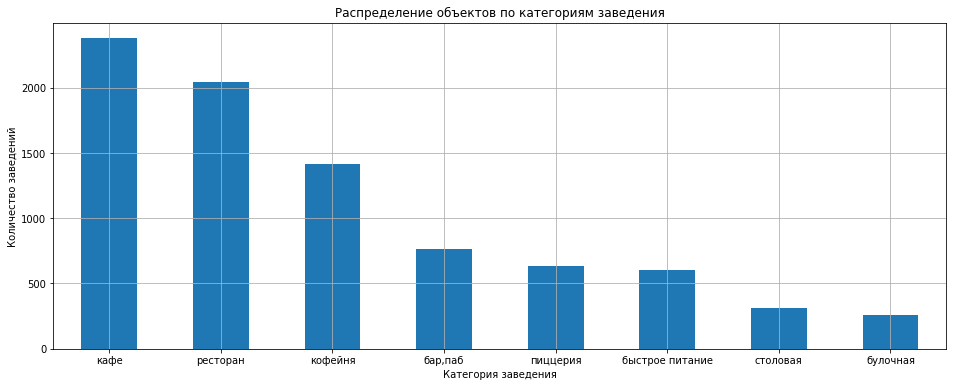

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение объектов по категориям заведения'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На диаграмме видим, что в г. Москва можно выделить три категории заведений общественного питания, которые более всего популярны:
+ кафе (2378);
+ ресторан (2043);
+ кофейня (1413).  

В категориях `бар,паб`, `пиццерия` и `быстрое питание` количество заведений распределилось относительно равномерно. 
Самые непопулярные категории-это `столовая` (315) и `булочная`(256).
Далее в исследовании посмотрим как категории заведений общественного питания распределяются по районам, посмотрим есть ли зависимость между ними. Есть предположение, что самые популярные категории сосредоточены в местах большой проходимости людей, к примеру туристов или в местах отдыха/семейного отдыха.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

Посмотрим распределение количества заведений по территориальному признаку нахождения по районам г. Москва. Выведем количество уникальных значений и распределение данных между ними.

In [31]:
# Посчитаем количество уникальных объектов общественного питания для каждого значения столбца district
print('Распределение заведений по значениям столбца district:')
df_analise_new['district'].value_counts()

Распределение заведений по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [32]:
# Посчитаем количество уникальных объектов общественного питания для каждого значения столбца district в относительном выражении
print('Распределение заведений по значениям столбца district %:')
round(df_analise_new['district'].value_counts(normalize=True),2)

Распределение заведений по значениям столбца district %:


Центральный административный округ         0.27
Северный административный округ            0.11
Южный административный округ               0.11
Северо-Восточный административный округ    0.11
Западный административный округ            0.10
Восточный административный округ           0.09
Юго-Восточный административный округ       0.08
Юго-Западный административный округ        0.08
Северо-Западный административный округ     0.05
Name: district, dtype: float64

Данные в относительном выражении по распределению количества заведений по районам г. Москва подтверждаю, что лидирующую позицию занимает `Центральный административный округ` -27%, равные доли распределения `Северный`, `Южный` и `Северо-Восточный` административные округа - 11%. Самый менее популярный район по присутствию заведений общественного питания - `Северо-Западный административный округ`-5%. По стальным районам процент колеблется с 10 до 8%.

Видим, что уникальных значений в этом столбце 9 , максимальное количество заведений в `Центральном административном округе`(2242), а минимальное в `Северо-Западном округе`(409), между другими районами значение количества заведений по остальными данные распределены в порядке убывания относительно равномерно. Для визуального анализа такого распределения объектов по районам г. Москва построим столбчатую диаграмму.

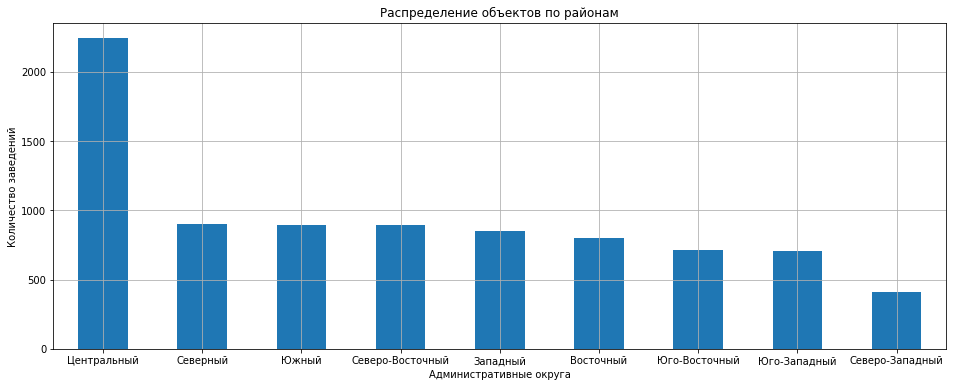

In [33]:
# Создадим словарь для замены длинных названий
district_replacements = {
    'Центральный административный округ': 'Центральный',
    'Северный административный округ': 'Северный',
    'Южный административный округ': 'Южный',
    'Северо-Восточный административный округ': 'Северо-Восточный',
    'Западный административный округ': 'Западный',
    'Восточный административный округ': 'Восточный',
    'Юго-Восточный административный округ': 'Юго-Восточный',
    'Юго-Западный административный округ': 'Юго-Западный',
    'Северо-Западный административный округ': 'Северо-Западный' 
}
# Заменим названия в столбце 'district'
df_new_district = df_analise_new['district'].replace(district_replacements)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_new_district.value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение объектов по районам'
)

# Настраиваем оформление графика
plt.xlabel('Административные округа')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Посмотрим, построив сводную таблицу как распределяются категрории заведений по всем районам.

In [34]:
# Создаем сводную таблицу
pivot_category_district=pd.pivot_table(df_analise_new,index=df_new_district,columns="category",values="id",aggfunc="count")
# Выводим таблицу 
display(pivot_category_district)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный,53,25,71,272,105,72,160,40
Западный,50,37,62,239,150,71,218,24
Северный,68,39,58,235,193,77,189,41
Северо-Восточный,63,28,82,269,159,68,182,40
Северо-Западный,23,12,30,115,62,40,109,18
Центральный,364,50,87,464,428,113,670,66
Юго-Восточный,38,13,67,282,89,55,145,25
Юго-Западный,38,27,61,238,96,64,168,17
Южный,68,25,85,264,131,73,202,44


По выведенной сводной таблице видим, что наибольшее количество заведений категории `кафе`, это мы ранее увидели на диаграмме `"Распределение объектов по категориям"` и они равномерно распределены по всем районам г. Москва, но самое максимальное находится в `Центральном районе`. Следующая категория с наибольшим количеством зведений`ресторан`, здесь тоже распределение между районами относительно равномерное кроме `Центрального района`, показатель количества сильно отличается от остальных. Сводная таблица ещё показывает, что максимальные показатели по категориям заведений находятся в строке по `Центральному району`. Стоит более детально посмотреть данное распределение.

По результатам распределения количества заведений по районам г. Москва заметили, что сильно отличается наличие в `Центральном административном округе`, посмотрим на распределения заведений в нем в разрезе категорий. Построим для наглядности столбчатую диаграмму.

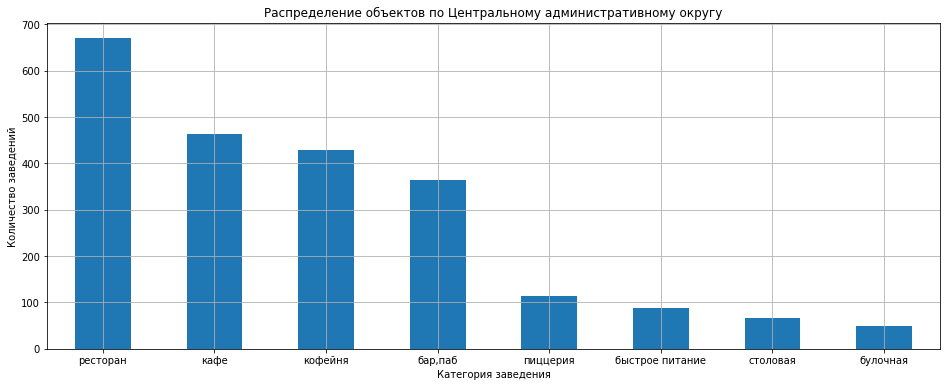

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 6))

# Фильтруем данные по району 
plot_district = df_analise_new.loc[df_analise_new['district'] == 'Центральный административный округ']

# Получаем количество объектов по категориям заведений
category_counts = plot_district['category'].value_counts()

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
category_counts.plot(
    kind='bar',  # Тип графика - столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title='Распределение объектов по Центральному административному округу',
    )

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [36]:
# Посмотрим детальней распределение объектов общественного питания для Центрального административного округа
print('Распределение заведений по Центральному административному округу:')
category_counts

Распределение заведений по Центральному административному округу:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

Заведения категории `ресторан` приобладают в `Центарльном административном` округе г. Москва , что в полне обоснованно, проходимостью людей и наличием большего количества туристов и отдыхающих. Следующими идут `кафе`(464) и `кофейня`(428), такая категория заведений тоже может быть очень популярна для проведения отдыха (с семьей, друзьями и т.д). На диаграмме наглядно видно распределения остальных  категории заведений, которые больше предполагают быстрый перекус(`быстрое питание, булочная`), место для проведения обеда(`столовая`)  или заказ еды на рабочее место/на дом (`пиццерия`), наибольшее количество офисов находится за пределами Центра города.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

Изучим распределение заведений на признак является ли заведение сетевым или нет в столбце `chain`(0-не является сетевым, 1-является сетевым).

In [37]:
print('Распределение данных по значениям столбца chain:')
print(df_analise_new['chain'].value_counts())
print(df_analise_new['chain'].value_counts(normalize=True))

Распределение данных по значениям столбца chain:
0    5201
1    3205
Name: chain, dtype: int64
0    0.618725
1    0.381275
Name: chain, dtype: float64


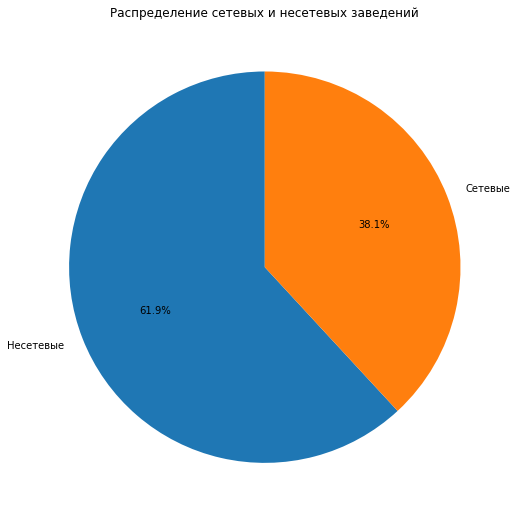

In [38]:

# Создадим словарь для замены длинных названий
chain_replacements = {
    0: 'Несетевые',
    1: 'Сетевые',  
}

# Заменим названия в столбце 'chain'
df_new_chain = df_analise_new['chain'].replace(chain_replacements)

# Получим доли для круговой диаграммы
chain_counts = df_new_chain.value_counts(normalize=True)

# Строим круговую диаграмму
chain_counts.plot.pie(
    autopct='%1.1f%%',  # Формат отображения процента
    startangle=90,      # Начальный угол
    figsize=(9,9),     # Размер графика
   )

# Настраиваем оформление графика
plt.title('Распределение сетевых и несетевых заведений')  # Заголовок графика
plt.ylabel('')  # Отключаем подпись для оси Y
plt.grid(False)  # Выключаем сетку для круговой диаграммы

# Выводим график
plt.show()

На круговой диаграмме наглядно видно, что доля сетевых заведений меньше, чем несетевых заведений:
  - Сетевые завеведения -38% (количество 3205);
  - Несетевые завеведения -62% (количество 5201).
  
Посмотрим распределение по данному признаку заведений в разрезе категорий.

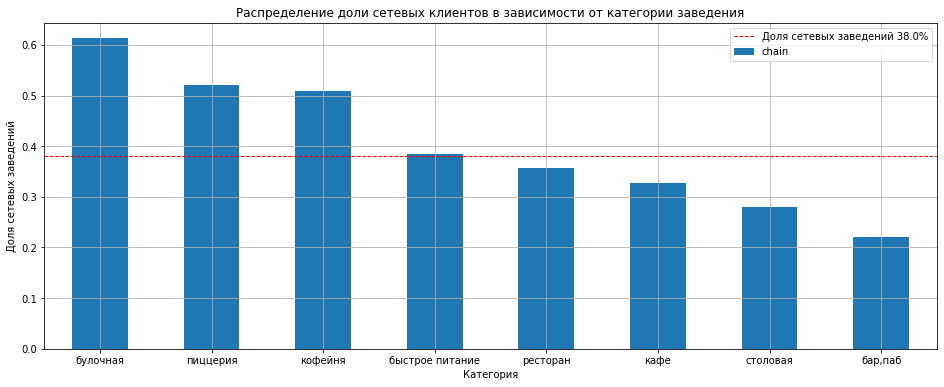

In [39]:
# Строим график столбчатой диаграммы
grouped_chain_category=df_analise_new.groupby('category')['chain'].mean()

# Сортируем результаты по среднему значению
sorted_grouped_chain_category = grouped_chain_category.sort_values(ascending=False)

sorted_grouped_chain_category.plot(kind='bar',
               title=f'Распределение доли сетевых клиентов в зависимости от категории заведения',
               legend=True,
               ylabel='Доля сетевых заведений',
               xlabel='Категория',
               rot=0,
               figsize=(16, 6))

# Рассчитываем среднее значение по доле нелояльных клиентов
mean_churn_share = df_analise_new['chain'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля сетевых заведений {round(mean_churn_share,2)*100}%')

plt.grid()
plt.legend()

# Выводим график
plt.show()

На визуализации видны различия долей сетевых заведений в разрезе категорий по отношению к среднему значению.
Самая большая доля сетевых из общего количества заведений в категории характерна для `булочная`(61%), `кофейня`(51%), `пиццерия`(52%). 
По стальным доли сетевых заведений в категории распределились так:
 - бар,паб            22%
 - быстрое питание    38%
 - кафе               33%
 - ресторан           36%
 - столовая           28%

Можем посмотреть распределение признака является ли заведение сетевым или нет по количеству заведений, построив сводную таблицу.

In [40]:
# Построим сводную таблицу, посчитав количество сетевых и несетевых заведений в разрезе категорий
chain_pivot = df_analise_new.pivot_table(index = 'category', columns = 'chain',values = 'id', aggfunc = 'count', margins = True)
# Переименуем название признака для удобства восприятия
chain_pivot.rename(columns={0: 'Несетевое', 1: 'Сетевое'}, inplace=True)
# Выводим таблицу
display(chain_pivot)

chain,Несетевое,Сетевое,All
category,,,
"бар,паб",596,169,765
булочная,99,157,256
быстрое питание,371,232,603
кафе,1599,779,2378
кофейня,693,720,1413
пиццерия,303,330,633
ресторан,1313,730,2043
столовая,227,88,315
All,5201,3205,8406


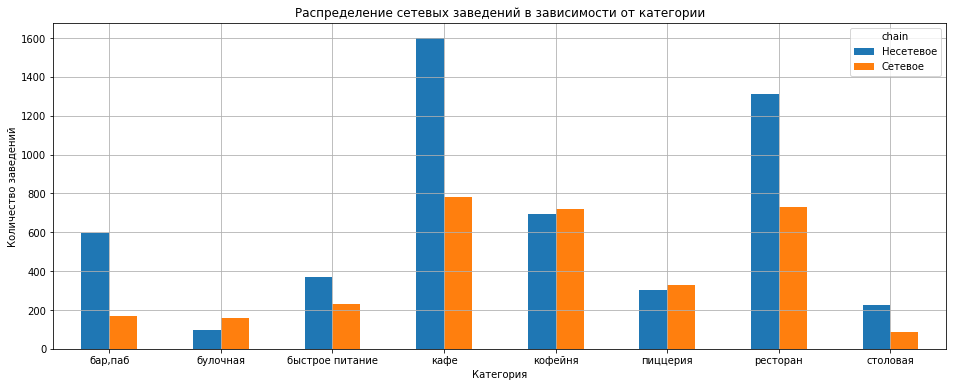

In [41]:
# В сводной таблице исключим столбец с общим количеством
chain_pivot_2 = df_analise_new.pivot_table(index = 'category', columns = 'chain',values = 'id', aggfunc = 'count')
# Переименуем название признака для удобства восприятия
chain_pivot_2.rename(columns={0: 'Несетевое', 1: 'Сетевое'}, inplace=True)

# Построим график столбчатой диаграммы
chain_pivot_2.plot(kind='bar',
               title=f'Распределение сетевых заведений в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(16, 6))
plt.grid()

# Выводим график
plt.show()

На диаграмее видим распределение по столбцу `chain` в соотношении внутри категории и по данным в целом. 
Как ранее опредилили,что количество несетевых заведений (62%) более распостранены в г. Москва, и среди категорий в целом, эта тенденция сохряняется. Только в трех категориях количество сетевых заведений  преодладает-это `булочная`(61%),`пиццерия`(52%) и `кофейня`(51%). 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


Рассмотрим данные по количеству посадочных мест `seats`, на выбросы  или аномальные значения, и рассмотрим распределения в зависимости от категорий заведения.
Начнем знакомство с статических показателей данного столбца методом `describe()`.

In [42]:
# Фильтруем данные, исключив значения индекс(-1), кторым были заполнены пропуски в стобце seats
df_seats=df_analise_new.loc[df_analise_new['seats'] >=0]
# Проверим результат
df_seats.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ_КОМНАТЫ,ресторан,"МОСКВА,_УЛИЦА_ДЫБЕНКО,_36,_КОРП._1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ_МАРКО,пиццерия,"МОСКВА,_ПРАВОБЕРЕЖНАЯ_УЛИЦА,_1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0,False
6,96ebceb1a09e4e3191133b9fe0379a64,ОГНИ_ГОРОДА,"бар,паб","МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_9,_СТР._3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,-1.0,False
7,0243288b78024af090b8e947842c969c,MR._УГОЛЁК,быстрое питание,"МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_9,_СТР._3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,-1.0,False


In [43]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df_seats['seats'].describe()

Статистические показатели столбца seats:


count    4795.000000
mean      108.421692
std       122.833397
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить, что данные по количеству посадочных мест имеют неравномерное распределение. Об этом говорит разница среднего и медианного значений. Однако значение стандартного отклонения — `122.83`, и при среднем `108.22` указывает, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает. Также можно предположить, минимальное значение равное `0` является аномальным

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с количеством посадочных мест.

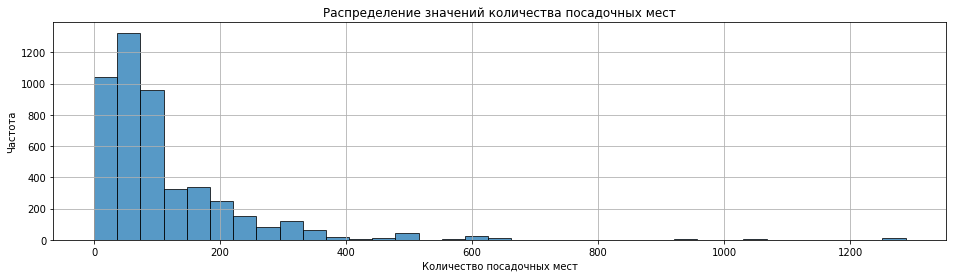

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_seats['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=35, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                legend=False, # Выключаем легенду
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме распределения видим, что распределение данных является ассиметричным,скошенным вправо, что подтверждается разницей значений среднего и медианы. Но смущает такое большое количество значений `0`, построим диаграмму размаха, чтобы проверить данные на наличие выбросов.

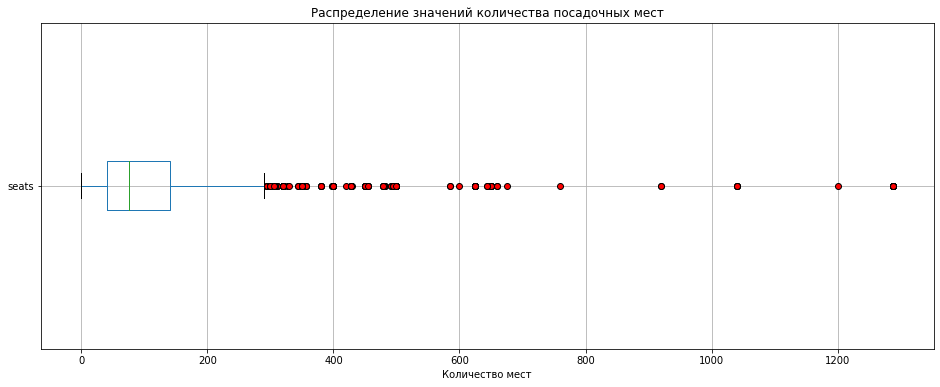

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 6))

# Строим диаграмму размаха значений в столбце balance
df_seats.boxplot(column='seats',
                 vert=False,
                 flierprops=dict(markerfacecolor='r'))  # Настраиваем вид выбросов (красные кружки))

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Исследуем заведения с аномально большим количеством посадочных мест.
По данным диаграммы размаха можно предположить,что значения после `600` могут содержать выбросы.
Проверим наше предположение, посчитав значения количества посадочных мест, которые находятся в данных за пределами 99%, а также верхний порог выбросов.

In [46]:
# Считаем 99% процентиль
outliers_seats=df_seats['seats'].quantile(0.99)
# Вычесляем 1 квартиль(25%)
outliers_seats_1=df_seats['seats'].quantile(0.25)
# Вычесляем 3 квартиль(75%)
outliers_seats_3=df_seats['seats'].quantile(0.75)
# Вычесляем межквартильный размаз
IQR=outliers_seats_3-outliers_seats_1
# Определяем верхний порог выбросов
upper_bond_seats=outliers_seats_3+1.5*IQR

# Выводим результат 99% квартиля и верхнего порога выбросов
print(f'Процентиль 99 % = {outliers_seats}')
print(f'Верхний порог выбросов = {upper_bond_seats}')

Процентиль 99 % = 625.0
Верхний порог выбросов = 290.0


Сделав доболнительную проверку, зачечаем большую разницу между процентилем в 99% и верхним порогом выбросов. 
Поэтому отфильтруем и сортируем в порядке убывания данные по количеству посадочных мест более 300 и посмотрим заведения каких категорий это могут быть.

In [47]:
# Делаем сортировку значений количества посадочных мест более 300 и сортируем в порядке убывания
df_anomaly_seats=df_analise_new.loc[df_analise_new['seats'] >=300].sort_values(by='seats',ascending=False)
# Выведем первые 20 значений
df_anomaly_seats.head(20)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6838,0b8062d352c84a65bca70622eecbc745,ALTERNATIVE_COFFEE,кофейня,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_41,_СТР._1",Западный административный округ,"пн-пт 09:00–21:00; сб,вс 09:00–22:00",4.3,0,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,DELONIXCAFE,ресторан,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_94,_КОРП._1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,-1.0,True
6658,19a223ff04f74af7a12bd87b77ce468b,ГУДБАР,"бар,паб","МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_97,_КОРП._1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,Средний счёт:700 ₽,700.0,-1.0,False
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,ЯПОНСКАЯ_КУХНЯ,ресторан,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_121,_КОРП._1",Западный административный округ,no_hours,4.4,1,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6771,6f85ea6419c941208f7deee9194383e1,ТОЧКА,кафе,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_84,_СТР._1",Западный административный округ,no_hours,4.7,1,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6807,ba5a32dfee6c4661a25c0ea2d39f393d,LOFT-CAFE_АКАДЕМИЯ,кафе,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_84,_СТР._1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6808,a555f30eac234e6ca28480afa418ed3c,ЯНДЕКС_ЛАВКА,ресторан,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_51,_СТР._1",Западный административный округ,"ежедневно, круглосуточно",4.0,1,1288.0,no_price,no_avg_bill,-1.0,-1.0,True
6641,0508ba663a4c42d1b5068e51afcc26ef,ONE_PRICE_COFFEE,кофейня,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_84,_СТР._1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6574,5925d9677fe24778a27e35ccd88c0a2d,МЮНГЕР,пиццерия,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_97,_КОРП._1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,no_price,no_avg_bill,-1.0,-1.0,False
6524,c93d20f53072495c9cf2e489914cb8a5,ЯН_ПРИМУС,ресторан,"МОСКВА,_ПРОСПЕКТ_ВЕРНАДСКОГО,_121,_КОРП._1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,-1.0,False


Гипотеза о наличии выбросов в данных подтверждается, это может являтся ошибкой, так как по названию одной улицы данные повторяются и в категориях `кафе`,`кофейня`,`столовая` и `бар,паб`маловероятным количество посадочных мест более `1288` до `600`. Возможно это ошибка при сборе данных или по одной улице указано общее количестао мест по всем находящимся на ней заведениям. Поэтому для дальнейшего анализа возьмем данные равные или меньше `300`.

По гистограмме распределения заметили польшое количество с значением посадочных мест с значением `0`. Посмотрим заведения каких категорий содержат такое значение.

In [48]:
# Посмотрим количество нулевых значений посадочных мест по категориям заведений, делаем сортировку
df_zero_seats=df_analise_new.loc[df_analise_new['seats'] ==0]
# Выводим количество таких заведений
df_zero_seats['category'].value_counts()

кафе               44
кофейня            24
ресторан           20
быстрое питание    18
булочная           11
пиццерия           10
столовая            5
бар,паб             4
Name: category, dtype: int64

Нулевое значение посадочных мест является аномальным для всех категорий кроме `булочная`. Возможно в данной категории не может быть посадочных мест, но их количество всего `11` из `254`, поэтому при дальнейшем анализе и выявления типичного количества посадочных мест для каждой категории не будем брать значения больше `600` и равные `0`.

Найдем для каждой категории заведений наиболее типичное для него количество посадочных мест с помощью вычесления моды.

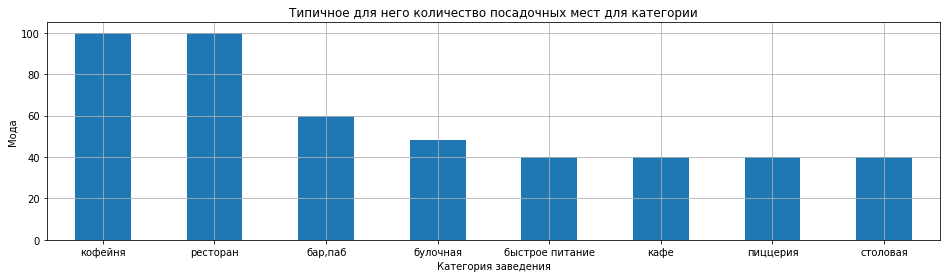

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

# Фильтруем данные, исключив нулевые значения и выбросов более 600 
df_seats_filtr= df_analise_new.loc[(df_analise_new['seats'] >0)&(df_analise_new['seats'] <=300)]

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_modes_seats=df_seats_filtr.groupby('category')['seats'].agg(lambda x: pd.Series.mode(x)[0]).sort_values(ascending=False).plot(
        kind='bar',  # Тип графика - диаграмма
        rot=0,  # Градус вращения подписи по оси Х
        legend=False,  # Выключаем легенду
        title='Типичное для него количество посадочных мест для категории',
    )

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Мода')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По выведенным даннным видно, что медианное значение по нескольким категориям значитьельно отличается от значений моды, это может говорить о неоднородности данных и скорее всего как мы уже выяснили в данных е

Типичное количество посадочных мест для каждой категории заведений распределилось следующим образом:
+ кофейня            100.0
+ ресторан           100.0
+ бар,паб             60.0
+ булочная            48.0
+ быстрое питание     40.0
+ кафе                40.0
+ пиццерия            40.0
+ столовая            40.0
    
Все данные выглядят вполне правдоподобно кроме категории `булочная` и `кофейня`. Можно предположить, что в данных есть ошибка в сборе данных по количеству мест. Это можно объяснить человеческим фактором, по названию улицы внесли общие данные или системный сбой при обработке данных.

Посмотрим также на медианное значение для каждой категории заведений. 

In [50]:
# Посчитаем значение медианы для каждой категории
df_median_seats=df_seats_filtr.groupby('category')['seats'].mean()
# выведем результат
round(df_median_seats).sort_values(ascending=False)

category
ресторан           101.0
бар,паб             94.0
кофейня             93.0
быстрое питание     90.0
булочная            86.0
столовая            84.0
кафе                81.0
пиццерия            81.0
Name: seats, dtype: float32

Значение медианы посадочных мест для кажой категории заведений сильно отличает от значения моды, как выяснилось раньше в данных присутствует большой разброс и вариативность значений. И медианные данные по некоторым категориям превышают значение моды в два раза и не выглядят правдоподобно. Только по одной кеатегории значение моды и медианы почти совпадает-это категория `ресторан`(медиана-101/мода-100), немного больше отличается, но близки друг другу по категории `кофейня`(медиана-93/мода-100).
Правильным будет решение, считать типичным для категории количеством мест по значению моды.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Исследуем рейтинги заведений, сначала построим гистограмму распределнения и посмотрим статистические показатели столбца `rating` .

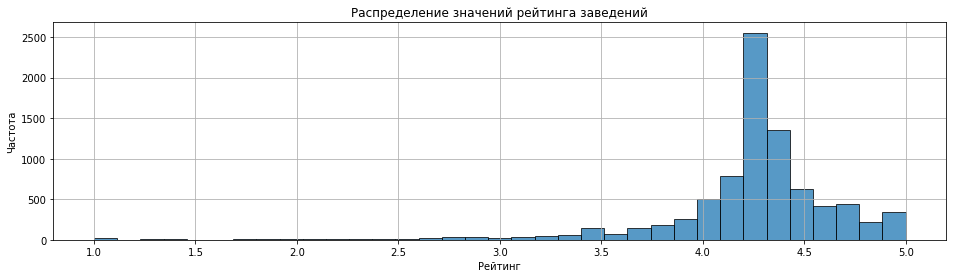

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_analise_new['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=35, # Устанавливаем количество корзин - всего 35
                alpha=0.75,
                legend=False, # Выключаем легенду
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [52]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца rating:')
df_seats['rating'].describe()

Статистические показатели столбца rating:


count    4795.000000
mean        4.241585
std         0.447178
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

На гистограмме распределения видим, что распределение данных является ассиметричным,скошенным влево, и по выведенным статистическим показателям заметили, что аномальных значений нет, минимальное равно `1` и максимальное равное `5`, чаще всего пользователи сервиса `Яндекс Карты` ставят оценку равную `4.3` и заведений с низкими оценками немного.

Рассмотрим распределение средних рейтингов по категориям заведений.

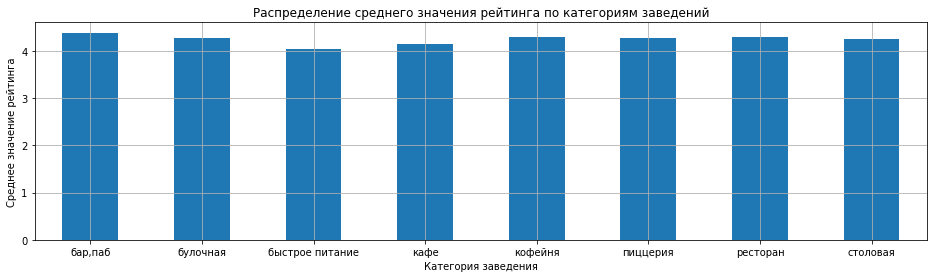

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_modes_seats=df_seats_filtr.groupby('category')['rating'].mean().plot(
        kind='bar',  # Тип графика - диаграмма
        rot=0,  # Градус вращения подписи по оси Х
        legend=False,  # Выключаем легенду
        title='Распределение среднего значения рейтинга по категориям заведений',
    )

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Среднее значение рейтинга')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Исходя из диаграммы распределения среднего значение рейтинга для каждой категории заведения видим, что все значения распределены равномерно приблизительно равные общему среднему значению рейтига `4.3`, кроме двух категорий-это `быстрое питание` (4.05) и `кафе`(4.15).

Теперь посмотрим как распределяются данные среднего значения в столбце `rating` по типам заведений. Построим график распределения по признаку является заведение сетевым или нет.

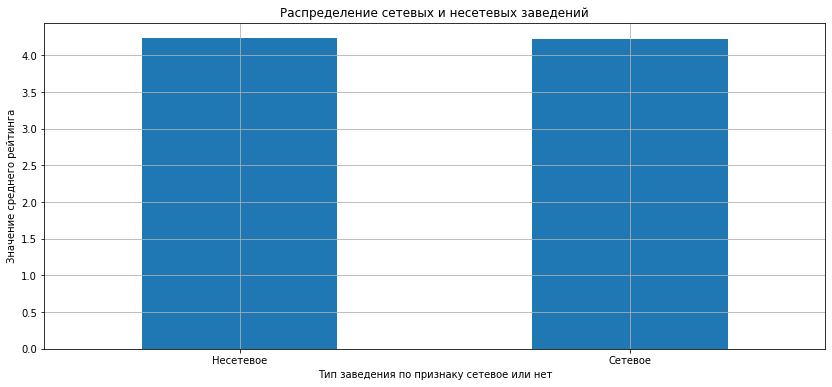

In [54]:
# Создаем сводную таблицу на базе которой строим диаграмму 
chain_pivot_rating = df_analise_new.pivot_table(index = 'chain', values = 'rating', aggfunc = 'mean')
# Переименуем название признака для удобства восприятия
chain_pivot_rating.rename(index={0: 'Несетевое', 1: 'Сетевое'}, inplace=True)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
chain_pivot_rating.plot(
    kind='bar',  # Тип графика - столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title='Распределение сетевых и несетевых заведений',
    figsize=(14,6)
    )
# Настраиваем оформление графика
plt.xlabel('Тип заведения по признаку сетевое или нет')
plt.ylabel('Значение среднего рейтинга')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Визуализация показывает, что среднее занчение между сетевыми и несетевыми заведениями равны и тип заведения не влияет на оценки пользователей сервиса `Яндекс Карты`, в сердем отношения к обоим типам лояльное.

Первоначальное знакомство с данными столбца `rating` показало, что взаимосвязи оценок от категории и типа заведений не наблюдается.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

Продолжим изучать значение в столбце `rating`, посмотрим корреляцию с данными по заведениям общепита г. Москвы, найдем самый большой показатель корреляции и рассмотрим его более детально.

Расситаем матрицу корреляции phi_k.

In [55]:
# Вычисляем корреляционную матрицу с использованием phi_k для выбранных признаков
correlation_matrix = df_analise_new[['category', 'district', 'chain', 'is_24_7', 'seats', 'price', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
# Фильтруем результаты, исключая саму переменную rating, и сортируем по убыванию
correlation_result = round(correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False),2)

correlation_result

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.31
category,0.20
district,0.19
is_24_7,0.16
chain,0.12
seats,0.00


Наибольшая корреляция рейтинга заведений наблюдается с ценовой категорией (0.31), для остальных признаков снижается с 0.20 до 0.

Визуализируем результат корреляции с помощью тепловой карты и библиотеки `seaborn`.

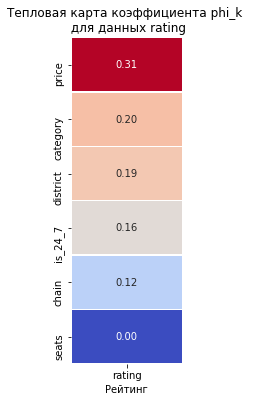

In [56]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Теперь корреляция между рейтингом заведений и другими признаками наглядно отображена. Можно продолжить исследование данных.

Рассчитаем средние значение рейтинга заведений группируя по категории цен и визулизируем результат с помощью столбчатой диаграммы.

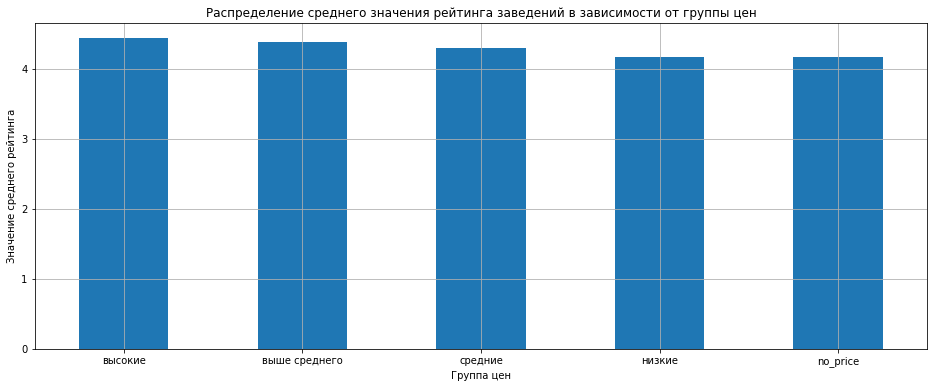

In [57]:
# Создаем сводную таблицу на базе которой строим диаграмму 
price_pivot_rating = df_analise_new.pivot_table(index = 'price', values = 'rating', aggfunc = 'mean').sort_values(by='rating', ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
price_pivot_rating .plot(
    kind='bar',  # Тип графика - столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title='Распределение среднего значения рейтинга заведений в зависимости от группы цен',
    figsize=(16,6)
    )
# Настраиваем оформление графика
plt.xlabel('Группа цен')
plt.ylabel('Значение среднего рейтинга')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Видно, что чёткой зависимости между значением рейтинга и группой цен заведений, но можем заметить, что более высокую оценку пользователи `Яндекс Карты` ставят заведениям с типом цен `высокие`(4.44), `выше среднего`(4.39) и `средние`(4.30). Показывают равные рейтинги 4.17 -это `низкие` и заведения у которых отсутствуют тип цен.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

Исследуем популярность заведений общественного питания г. Москва. Для этого выведем таблицу с названиями Топ-15 популярных заведений, критерием для отбора будем считать их общее количество по городу, и так же посчитаем для них среднее значение рейтинга. Для большей наглядности построим линейчатую диаграмму, посмотрим как распределяется средний рейтинг в зависимости от популярности.

In [58]:
df_top_name = df_analise_new.query('chain ==True').groupby(['name','category'],
            as_index=False).agg({'id':'count','rating':'mean'}).sort_values(by='id',
            ascending=False)
# Устанавливаем индекс, начиная с 1
df_top_name.reset_index(drop=True, inplace=True)
df_top_name.index += 1
# Переименовываем столбцы
df_top_name.rename(columns={'id': 'Количество заведений', 'rating': 'Средний рейтинг','category': 'Категория'}, inplace=True)
round(df_top_name.head(15),2)

,name,Категория,Количество заведений,Средний рейтинг
1,ШОКОЛАДНИЦА,кофейня,119,4.18
2,ДОМИНО'С_ПИЦЦА,пиццерия,76,4.17
3,ДОДО_ПИЦЦА,пиццерия,74,4.29
4,ONE_PRICE_COFFEE,кофейня,71,4.06
5,ЯНДЕКС_ЛАВКА,ресторан,69,3.87
6,COFIX,кофейня,65,4.08
7,PRIME,ресторан,49,4.11
8,КОФЕПОРТ,кофейня,42,4.15
9,КУЛИНАРНАЯ_ЛАВКА_БРАТЬЕВ_КАРАВАЕВЫХ,кафе,39,4.39
10,ТЕРЕМОК,ресторан,36,4.11


In [59]:
# Делаем копию датафрейма 
df_top_name_15=df_top_name.copy()
# Сортируем данные в порядке возрастания 
df_top_name_15=df_top_name.head(15).sort_values(by='Количество заведений', ascending=True)

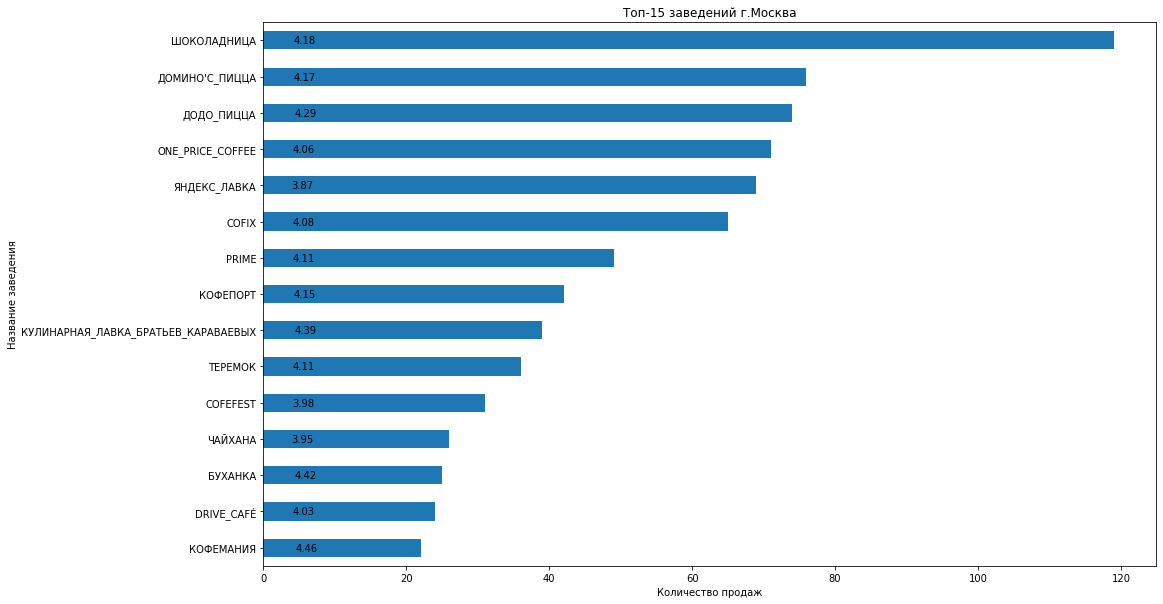

In [60]:
# Строим линейчатую диаграмму
df_top_name_15.plot(kind='barh', x='name', y= 'Количество заведений', legend=False,figsize=(16,10))

# Добавляем подписи к осям и заголовок
plt.ylabel('Название заведения')
plt.xlabel('Количество продаж')
plt.title('Топ-15 заведений г.Москва')

# Добавляем подписи данных из столбца 'Средний рейтинг'
for i, value in enumerate(df_top_name_15['Средний рейтинг']):
    plt.text(value, i, str(round(value,2)), ha='left', va='center')


# Показываем график
plt.show()


Посмотрим на линейчатую диаграмму и выделим Топ-3 сетевых заведений по назавнию, среднему рейтингу и категории заведения.  
**По названию выделяем:**
1. ШОКОЛАДНИЦА - 119;
2. ДОМИНО'С_ПИЦЦА - 76;
3. ДОДО_ПИЦЦА - 74.  
**По среднему рейтингу выделяем:**
1. КОФЕМАНИЯ - 4.46;
2. ДОМИНО'С_ПИЦЦА - 4.42;
3. ДОДО_ПИЦЦА - 4.39.  
**По категориям заведений:**
1. кофейня (ШОКОЛАДНИЦА) - 119;
2. пиццерия(ДОМИНО'С_ПИЦЦА) - 76;
3. ресторан(ЯНДЕКС_ЛАВКА) - 69. 

Также по данным линейчатой диаграммы можем заметить, что самые популярные сетевые заведения общественного питания г. Москва в основном имеют значение среднего рейтинга ниже значения среднего по всем данным`4.30`. У трех самых популярных сетевых заведений значение среднего рейтинга распределилось так:
1. ШОКОЛАДНИЦА - 4.18;
2. ДОМИНО'С_ПИЦЦА - 4.17;
3. ДОДО_ПИЦЦА - 4.29.  

Следовательно можно сделать вывод, что на популярность заведений показатель рейтинга имеет минимальное влияние. 
В основном популярными сетевыми заведениями, являются те, в которых можно быстро пообедать, провести время за чашечкой кофе и можно предположить, что данные заведения должны распологаться в основной массе в спальных районах и наличия офисов.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Изучим данные по столбцу `middle_avg_bill` с оценкой средгнего чека, и рассмотрим изменения и связь данного показателя в зависимости от района г. Москва.

Сначала выведем статистические показатели стольца `middle_avg_bill`, посмотрим распределение данных.

In [61]:
# Фильтруем данные, исключив значения индекс(-1), кторым были заполнены пропуски в стобце middle_avg_bill
df_middle_avg_bill=df_analise_new.loc[df_analise_new['middle_avg_bill'] >=0]
# Проверим результат
df_middle_avg_bill.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ_КОМНАТЫ,ресторан,"МОСКВА,_УЛИЦА_ДЫБЕНКО,_36,_КОРП._1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ_МАРКО,пиццерия,"МОСКВА,_ПРАВОБЕРЕЖНАЯ_УЛИЦА,_1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0,False
6,96ebceb1a09e4e3191133b9fe0379a64,ОГНИ_ГОРОДА,"бар,паб","МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_9,_СТР._3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,-1.0,False
7,0243288b78024af090b8e947842c969c,MR._УГОЛЁК,быстрое питание,"МОСКВА,_КЛЯЗЬМИНСКАЯ_УЛИЦА,_9,_СТР._3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,-1.0,False


In [62]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца middle_avg_bill:')
df_middle_avg_bill['middle_avg_bill'].describe()

Статистические показатели столбца middle_avg_bill:


count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Статистические данные показывают неравномерное распределение значений оценки среднего чека и видим, что есть нулевое минимальное значение и максимальное равное `35000`, в принципе такими могут быть данные, 0- чеке были бонус или акционный товар/блюдо(2+1), а в ресторане чек в 35000, тоже имеет место быть, если в нем отмечали торжество(свадьба или день рождения). Но стоит рассмотреть более подробно. Построим гистограмму распределения и диаграмму размаха.

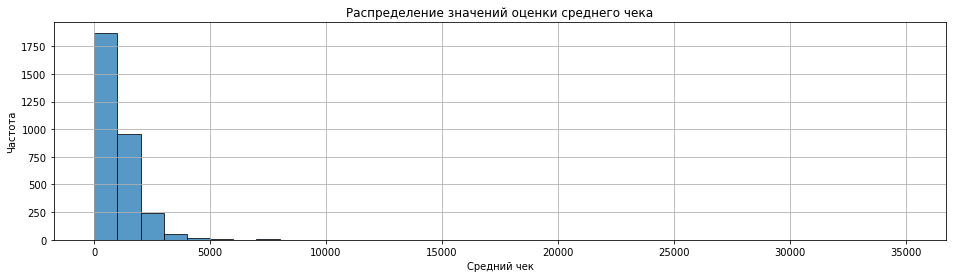

In [63]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_middle_avg_bill['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=35, # Устанавливаем количество корзин - всего 35
                alpha=0.75,
                legend=False, # Выключаем легенду
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На графике наблюдается правосторонняя ассиметрия -правый хвост распределения явно вытянут. Это указывает на наличие высоких значений, что мы и увидели в `max-35000` статистических данных, на это также указывала большая разница между средним и медианным значением.

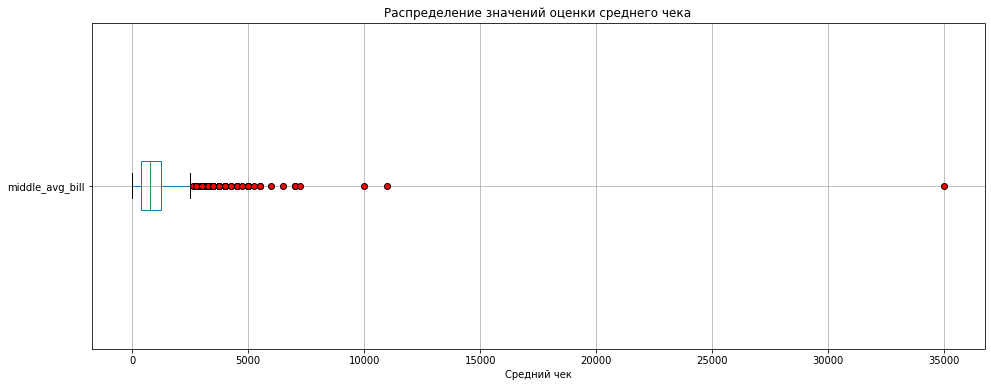

In [64]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 6))

# Строим диаграмму размаха значений в столбце balance
df_middle_avg_bill.boxplot(column='middle_avg_bill',
                 vert=False,
                 flierprops=dict(markerfacecolor='r'))  # Настраиваем вид выбросов (красные кружки))

# Добавляем заголовок и метки оси
plt.title('Распределение значений оценки среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

На диаграмме размаха видним разницу в между усами левым и правым, можно предположить, что за пределами правого уса могут быть выбросы, чтобы убедиться в этом рассчитаем 99% процентиль и межквартильный размах.

In [65]:
# Посмотрим количество нулевых значений нулевой оценкой среднего чека
df_zero_avg_bill=df_middle_avg_bill.loc[df_analise_new['middle_avg_bill']==0]
# Выводим количество таких заведений
df_zero_avg_bill['middle_avg_bill'].value_counts()

0.0    1
Name: middle_avg_bill, dtype: int64

Гипотеза о бонусном продукте вполне поддтверждается, так как нулевое значение всего одно.

In [66]:
# Отфильтруем из данных столбца middle_avg_bill нулевое значение
df_no_zero_avg_bill=df_middle_avg_bill.loc[df_analise_new['middle_avg_bill']!=0]

Теперь вычислим значения которые находятся за пределами `99%` значений оценки среднего чека, а также верхний порог межквартильного размаха и выделим выбросы, далее решим до какого значения среднего чека будем фильтровать данные для дальнейшего анализа.

In [67]:
# Считаем 99% процентиль
outliers=df_no_zero_avg_bill['middle_avg_bill'].quantile(0.99)
# Вычесляем 1 квартиль(25%)
outliers_1=df_no_zero_avg_bill['middle_avg_bill'].quantile(0.25)
# Вычесляем 3 квартиль(75%)
outliers_3=df_no_zero_avg_bill['middle_avg_bill'].quantile(0.75)
# Вычесляем межквартильный размаз
IQR=outliers_3-outliers_1
# Определяем верхний порог выбросов
upper_bond=outliers_3+1.5*IQR

# Выводим результат 99% квартиля и верхнего порога выбросов
print(f'Процентиль 99 % = {outliers}')
print(f'Верхний порог выбросов = {upper_bond}')

Процентиль 99 % = 3750.0
Верхний порог выбросов = 2562.5


Возьмем значение 99% процентиля для фильтрации данных, так как для категории `ресторан` такой средний чек может быть вполне возможен и данная категория по количеству заведений стоит на втором месте(2043).

Посмотрим взаимосвязь среднего чека от района нахождения заведения общественного питания, построив гистограмму рассеяния.

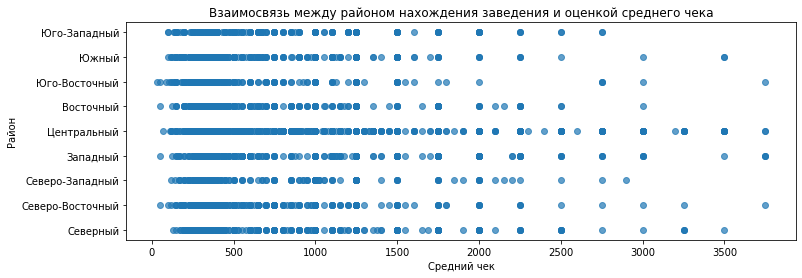

In [68]:
# Создаём контейнер графика
plt.figure(figsize=(12, 4))

# Фильтруем данные, исключив нулевые значения и выбросов более 3750 
df_middle_avg_bill_filtr = df_middle_avg_bill.loc[(df_analise_new['middle_avg_bill'] > 0) & (df_analise_new['middle_avg_bill'] <= 3750)]

# Строим график рассеяния
plt.scatter(df_middle_avg_bill_filtr['middle_avg_bill'],
            df_middle_avg_bill_filtr['district'].replace(district_replacements),
            marker='o', # Задаём стиль маркера
            alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между районом нахождения заведения и оценкой среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Район')


# Отображаем график
plt.show()

На диаграмме видно, взаимосвязь между расположением заведения и средним чеком действительно есть. По `Центральному району` средний чек более плотно распределен до 1500, следующие районы показывающие плотность в диапазоне до 1000-это `Юго-Западный`, `Северный` и `Северо-Восточный`, `Южный` в диапазоне 700, `Юго-Восточный` в диапазоне до 650,  `Восточный`и `Западный` в диапазоне до 800, самый наименьший показатель распределения средней цены показает `Северо-Западный` район.

Сперва посмотрим среднее значение среднего чека для каждого района г. Москва

In [69]:
# Создаем сводную таблицу cо средним значением среднего чека для каждого района г. Москвы
pivot_middle_avg_bill_district=pd.pivot_table(df_middle_avg_bill_filtr,index=df_middle_avg_bill_filtr['district'].replace(district_replacements),values="middle_avg_bill")
# Выводим таблицу 
round(pivot_middle_avg_bill_district)

,middle_avg_bill
district,
Восточный,767.0
Западный,1030.0
Северный,873.0
Северо-Восточный,704.0
Северо-Западный,822.0
Центральный,1113.0
Юго-Восточный,654.0
Юго-Западный,793.0
Южный,725.0


Теперь можем более детально посмотреть как распределен показатель оценки средней цены по району, для этого построим гистограмму распределения для кажого. Для каждой гистограммы выведем линию `KDE`, чтобы посмотреть пики,соответствующие наиболее частотным значениям среднего чека по выбранному району.

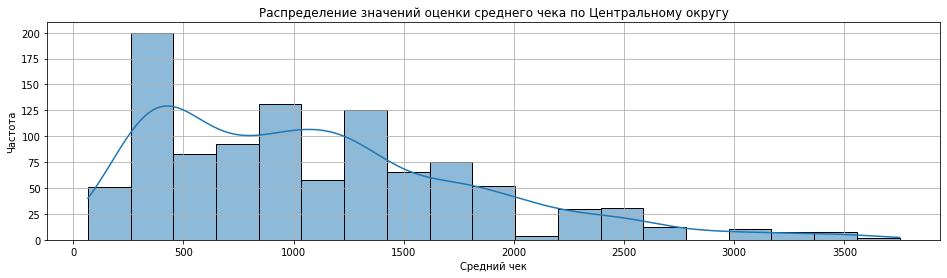

In [70]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr1 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Центральный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr1, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Центральному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Центральному округу видим неравномерное распределения, где линия `KDE` имеет два пика, один выпадает на значение около `490` и второй пик чуточку меньше и плавнее выпадает на диапазон с `1000-1200`. Среднее значение для данного района равно `1113`.  

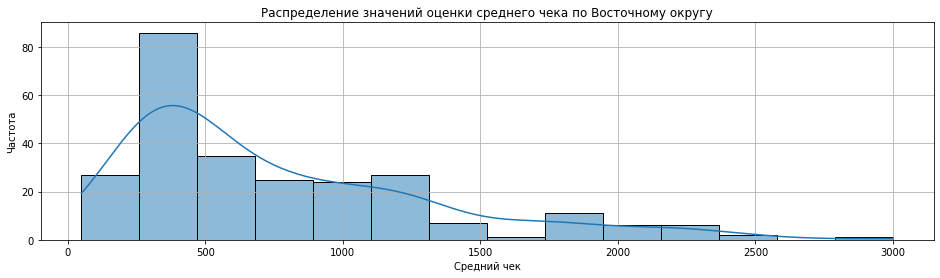

In [71]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr2 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Восточный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr2, x='middle_avg_bill',kde=True)


# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Восточному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Восточному округу видим неравномерное распределения со сдвигом вправо, где линия `KDE` и её пик выпадает на значение около `470`. Среднее значение для данного района равно `767`.

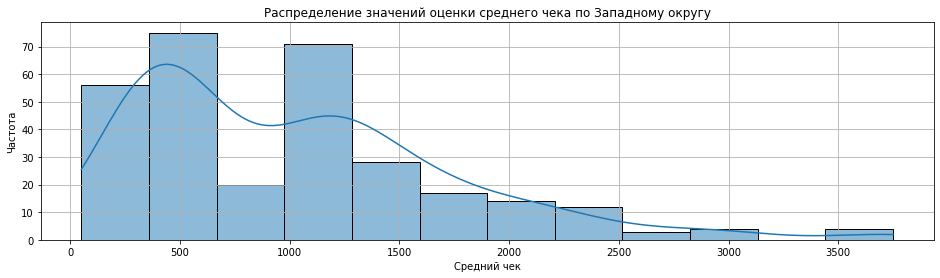

In [72]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr3 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Западный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr3, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Западному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Западному округу видим неравномерное распределения, где линия `KDE` имеет два пика, один выпадает на значение около `480` и второй пик чуточку меньше и плавнее выпадает на диапазон с `1000-1300`. Среднее значение для данного района равно `1030`.

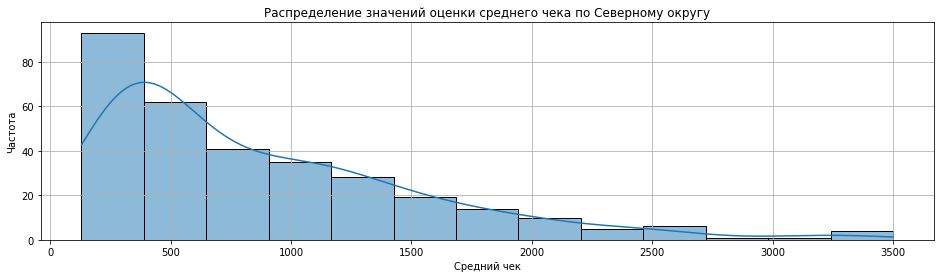

In [73]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr4 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Северный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr4, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Северному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Северному округу видим неравномерное, но плавное правосторонее распределение,где линия `KDE` и её пик выпадает на значение около `470`. Среднее значение для данного района равно `873`.

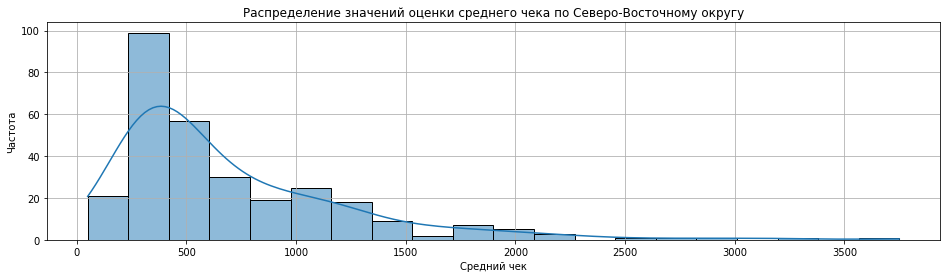

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr5 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Северо-Восточный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr5, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Северо-Восточному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Северо-Восточному округу видим неравномерное, но плавное правосторонее распределение,где линия `KDE` и её пик выпадает на значение около `490`. Среднее значение для данного района равно `704`.

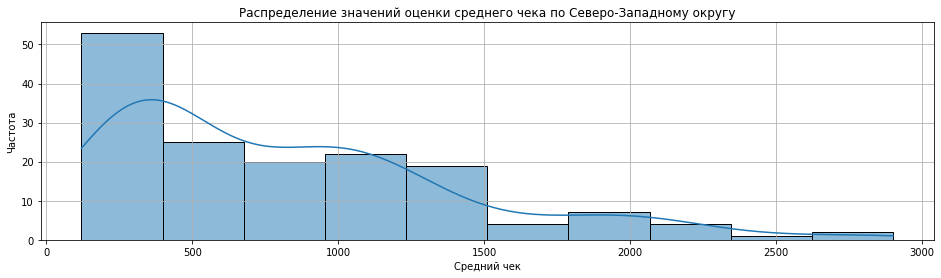

In [75]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr6 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Северо-Западный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr6, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Северо-Западному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Северо-Западному округу видим неравномерное распределения, где линия `KDE` выпадает на значение около `460` и плавно плотность распределяется до значения в `1200`. Среднее значение для данного района равно `1030`.

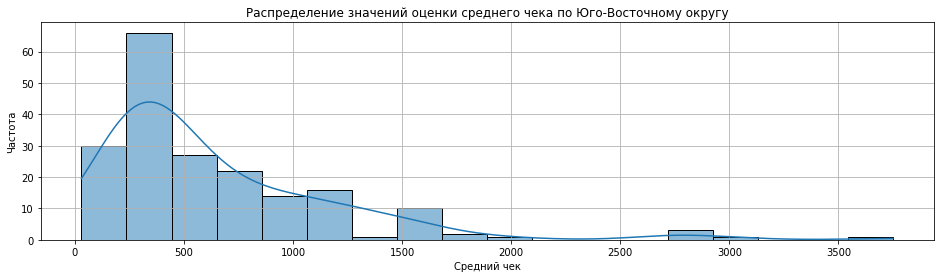

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr7 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Юго-Восточный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr7, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Юго-Восточному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Юго-Восточному округу видим неравномерное, но плавное правосторонее распределение,где линия `KDE` и её пик выпадает на значение около `450`. Среднее значение для данного района равно `654`.

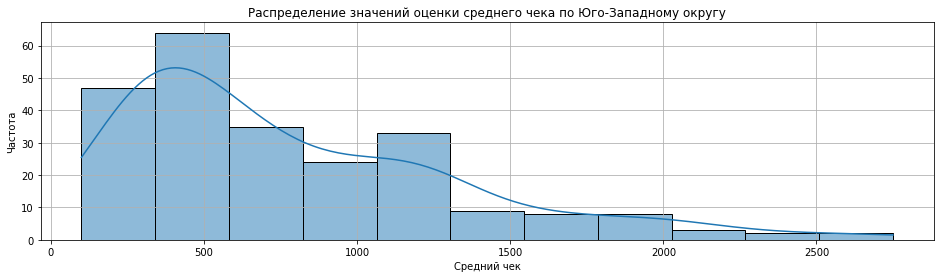

In [77]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr8 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Юго-Западный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr8, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Юго-Западному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Юго-Западному округу видим неравномерное, правосторонее распределение, где линия `KDE` и её пик выпадает на значение около `430`. Среднее значение для данного района равно `793`.

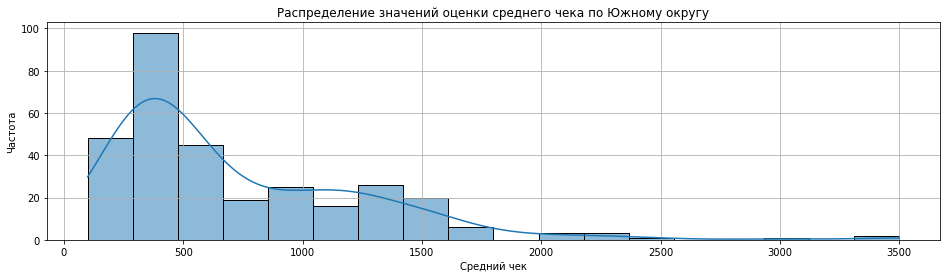

In [78]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16,4))

df_middle_avg_bill_filtr9 = df_middle_avg_bill_filtr.loc[df_middle_avg_bill_filtr['district'] == 'Южный административный округ']

# Строим гистограмму с помощью pandas через sns.histplot
sns.histplot(data=df_middle_avg_bill_filtr9, x='middle_avg_bill',kde=True)

# Настраиваем оформление графика
plt.title('Распределение значений оценки среднего чека по Южному округу')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На гистограмме по Юго-Западному округу видим неравномерное, правосторонее распределение, где линия `KDE` и её пик выпадает на значение около `400`. Среднее значение для данного района равно `725`.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [79]:
# Фильтруем данные, исключив значения индекс(-1), кторым были заполнены пропуски в стобце middle_coffee_cup
df_middle_coffee_cup=df_analise_new.loc[df_analise_new['middle_coffee_cup'] >=0]
# Проверим результат
df_middle_coffee_cup.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE_COFFEE_SHOP,кофейня,"МОСКВА,_УЛИЦА_МАРШАЛА_ФЕДОРЕНКО,_12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,no_price,Цена чашки капучино:155–185 ₽,-1.0,170.0,False
72,b06125653db34a9886dedc249350bc5c,ЛАКРИЦА,кофейня,"МОСКВА,_АЛТУФЬЕВСКОЕ_ШОССЕ,_85",Северо-Восточный административный округ,"ежедневно, 08:00–21:00",4.5,0,12.0,средние,Цена чашки капучино:150–190 ₽,-1.0,170.0,False
81,22d07638b1d449528e272ed08c32cc10,COFFEE_WAY,кофейня,"МОСКВА,_АЛТУФЬЕВСКОЕ_ШОССЕ,_86,_КОРП._1",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",4.3,1,120.0,no_price,Цена чашки капучино:120–170 ₽,-1.0,145.0,False
89,9ddc4ae683d14ce786ed17cc5974ad15,САХАРОЧЕК,кофейня,"МОСКВА,_ДМИТРОВСКОЕ_ШОССЕ,_107А,_КОРП._2",Северный административный округ,пн-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00,4.5,0,120.0,средние,Цена чашки капучино:100–200 ₽,-1.0,150.0,False
100,e111050683f042d1abae7185fd1fa19c,TAKE_AND_WAKE,кофейня,"МОСКВА,_ДМИТРОВСКОЕ_ШОССЕ,_100,_СТР._2",Северный административный округ,пн-пт 08:30–18:30,4.5,1,120.0,низкие,Цена чашки капучино:150–210 ₽,-1.0,180.0,False


In [80]:
# Изучаем статистические показатели столбца middle_coffee_cup
print('Статистические показатели столбца middle_coffee_cup:')
df_middle_coffee_cup['middle_coffee_cup'].describe()

Статистические показатели столбца middle_coffee_cup:


count     535.000000
mean      174.721497
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

Посмотрим возможные выбросы в данных столбца `middle_coffee_cup` построив диаграмму размаха.

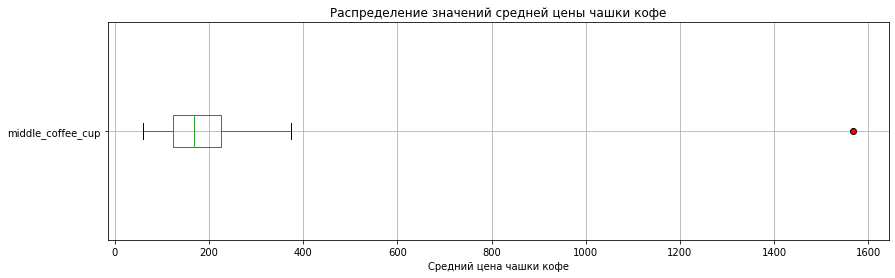

In [81]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 4))

# Строим диаграмму размаха значений в столбце balance
df_middle_coffee_cup.boxplot(column='middle_coffee_cup',
                 vert=False,
                 flierprops=dict(markerfacecolor='r'))  # Настраиваем вид выбросов (красные кружки))

# Добавляем заголовок и метки оси
plt.title('Распределение значений средней цены чашки кофе')
plt.xlabel('Средний цена чашки кофе')

# Выводим график
plt.show()

На диаграмме размаха видим, что значение выброса всего одно равное максимальному в статистических данных `1568`. Поэтому исключим это значение из данных, для дальнейшего анализа. Возьмем значение верхнего квартиля(75%)-это меньше или равное значению `225`.

In [82]:
# Фильтруем данные, исключив выброс c значением 1568 
df_middle_coffee_cup_filtr = df_middle_coffee_cup.loc[(df_middle_coffee_cup['middle_avg_bill'] <= 225)]

Рассмотрим  значение в столбце middle_avg_bill, посмотрим корреляцию с данными по заведениям общепита г. Москвы, найдем самый большой показатель корреляции и рассмотрим его более детально.

Расситаем матрицу корреляции phi_k.

In [83]:
# Вычисляем корреляционную матрицу с использованием phi_k для выбранных признаков
correlation_matrix_coffe = df_middle_coffee_cup_filtr[['category', 'district', 'chain', 'is_24_7', 'seats', 'price', 'middle_coffee_cup']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной middle_coffee_cup')
# Фильтруем результаты, исключая саму переменную rating, и сортируем по убыванию
correlation_result_coffe = round(correlation_matrix_coffe.loc[correlation_matrix_coffe.index != 'middle_coffee_cup'][['middle_coffee_cup']].sort_values(by='middle_coffee_cup', ascending=False),2)

correlation_result_coffe

interval columns not set, guessing: ['chain', 'seats', 'middle_coffee_cup']
Корреляционная матрица с коэффициентом phi_k для переменной middle_coffee_cup


,middle_coffee_cup
district,0.26
is_24_7,0.22
price,0.21
chain,0.19
seats,0.06
category,0.00


Наибольшая корреляция средней цены чашки кофе наблюдается с районом расположением заведения г Москва (0.26), для остальных признаков снижается с 0.22 до 0.

Визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn.

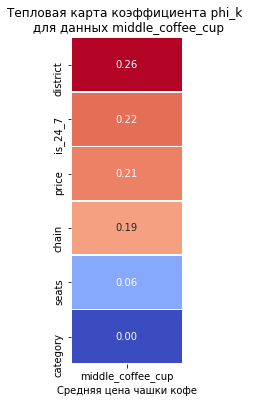

In [84]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap_coffe = round(correlation_matrix_coffe.loc[correlation_matrix_coffe.index != 'middle_coffee_cup'][['middle_coffee_cup']].sort_values(by='middle_coffee_cup', ascending=False),2)
sns.heatmap(data_heatmap_coffe,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных middle_coffee_cup')
plt.xlabel('Средняя цена чашки кофе')

# Выводим график
plt.show()

Теперь корреляция между средней ценой чашки кофе и другими признаками наглядно отображена. Можно продолжить исследование данных.

Сгруппируем данные по районам расположения заведений и визулизируем результат с помощью столбчатой диаграммы.

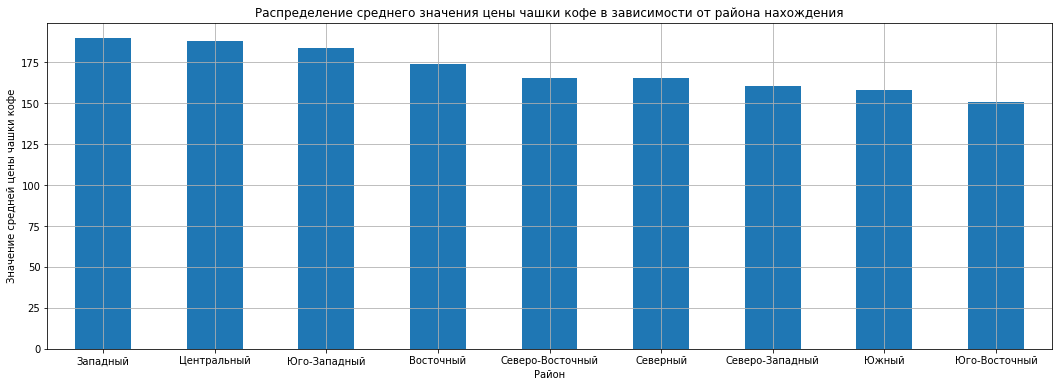

In [85]:

# Создаем сводную таблицу на базе которой строим диаграмму 
price_pivot_coffee_cup = df_middle_coffee_cup_filtr.pivot_table(index = df_middle_coffee_cup_filtr['district'].replace(district_replacements), values = 'middle_coffee_cup').sort_values(by='middle_coffee_cup', ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
price_pivot_coffee_cup.plot(
    kind='bar',  # Тип графика - столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title='Распределение среднего значения цены чашки кофе в зависимости от района нахождения',
    figsize=(18,6)
    )
# Настраиваем оформление графика
plt.xlabel('Район')
plt.ylabel('Значение средней цены чашки кофе')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

При рассморении диаграммы по распределению значения средней цены чашки кофе в зависимости от места нахождения заведения, можем заметить, что тенденция сохраняется как при распределении среднего чека, более высокая цена приобладает в `Западном административном округе`- 190 и `Центральном административном округе`-188, чуть меньше средняя цена чашки кофе в  `Юго-Западном административном округе`-183. По остальным округам этот показатель лежит в диапазоне 174-151. Хотя зависимость средней цены чашки кофе и района расположения заведения присутствует, но влияние совсем минимальное.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.


**Для исследования были представленны данные двух дата сетов:**
+ /datasets/rest_info.csv - информация о заведениях общественного питания(содержит 9 столбцов и 8406 строк);
+ /datasets/rest_price.csv - информация о среднем чеке заведений общественного питания(содержит 5 столбцов и 4058 строк).
Мы познакомились с данными, проверили форматы предоставленных данных, объем данных, соответствие название столбцов к типу `snake case`. Для дальнейшего анализа датасеты были объеденены в единый дата фрейм, с которым работали дальше над предобработкой данных.
Выполненые шаги предобрапотки данных:
+ Тип данных соответствовал значению, произвели только оптимизацию с понижением разрядности в 5 столбцах датафрейма, для сокращения объема храниимых данных;

+ Изучили пропущенные значения в данных. Пропуски в стобцах с целочисленным значением и значением с плавующей точкой заменили на индикаторные (-1), в столбцах с категориальными данными заполнили значениями об их отсутствии. Пропуски обнаружены были в 6 столбцах. Возможными причинами их появления могли стать: сбой при обработке данных, данные о заведении не были добавленны в общедоступный источник, или в данных пропуски могли быть вполне обоснованы (к примеру посадочных мест в булочных может быть не предусмотрено);

+ Осуществили поиск неявных и явных дубликатов. Для выявления неявных дубликатов в столбцах `name` и `addres` изменили  регистр написания на верхний,удалили лишние пробелы и пробелы между словами на нижнее подчеркивание.Всего выявили 103 неявных дубликата. Явных дубликато по полному совпадению в строке выявлено не было, но в связке названий в столбцах `name` и `addres` все же выявили 4 дубликата и удалили их;

+ Для удобства исследования и взимосвязи в данных добавили столбец `is_24_7`, который показывает является ли заведение общественного питания круглосуточным. Значение в столбце представленно значениями `True` или `False`.

**Анализ данных в ходе исследования выявил факторы возможной взаимосвязи между показателями заведений общественного питания г. Москва:**
+ Показатель среднего рейтинга заведений по г. Мосвка не показал взаимосвязи между популярностью категорий заведений, как выявилось среди самых популярных сетевых заведений показатель среднего рейтинга ниже усреднего показателя 4.3:
1. ШОКОЛАДНИЦА - 4.18;
2. ДОМИНО'С_ПИЦЦА - 4.17;
3. ДОДО_ПИЦЦА - 4.29.

Та же тенденция сохраняется в общем по всем заведениям независимо от принадлежности к сетевым или нет;

+ Взаимосвязь показателя среднего рейтинга и группы цен имеет слабую зависимость, но все же более высокую оценку пользователи Яндекс Карты ставят заведениям с типом цен `высокие` (4.44), `выше среднего` (4.39) и `средние` (4.30); 

+ Показатель среднего чека по заведениям общественного питания г. Москва показывает широкую вариативность, заметели взаимосвязь между районом расположения заведения и значением среднего чека. Большьший показатель с разбегом до 1500 представлен в `Центральном административном округе`, следующие по показателю являются  до 1000 -это `Юго-Западный`, `Северный` и `Северо-Восточный` административные округа. Наименьший показатель у `Северо-Западного` административного округа в диапазоне до 800;

+ Детально по каждому району показатель среднего чека распределен не равномерно в основном с правосторонним смещением. Выделим три района с наибольшим значением показателя среднего чека:
1. Центральный - 1113;
2. Западный - 1030;
3. Северный - 873. 

Эти данные вторят значениям популярности районов по количеству заведений, такие как `Центральный` (2242) и `Северный`(900) адмиминистративные округа. Следовательно в самых популярных для расположения заведений общественного питания районов значение среднего чека выше.

+ Взяв за основу популярность заведений категории `кафе` был изучен показатель средней цены чашки кофе. Как и с показателем среднего чека выявлена зависимость данного показателя от района расположения заведения общественного питания. Более высокая цена преобладает в `Западном административном округе`- 190 и `Центральном административном округе`-188, чуть меньше средняя цена чашки кофе в `Юго-Западном административном округе`-183. По остальным округам этот показатель лежит в диапазоне 174-151

В качестве рекомендаций инвесторам для выбора места расположения нового заведения общественного питания выбрать:

+ район распложения-Западный или Центральный администрвтивный округ, так как в этих районах с большей плотностью представлены заведения среди популярных категорий и показатели среднего чека и чашки кофе более высоки;

+ категория заведения-согласно рекомендации по выбору места расположения целесообразно выбрать категорию заведения `кафе`(2378) или `кофейня`(1043), данные категории более всех представлены в рекомендованных районах;

+ по количеству осадочных мест- количество посадочных мест для категории `кафе` - 40, а для категории `кафе` - от 40-80 (значение в 100 мест для данной категории представляется немного завышенным);

Можно также рекомендовать не выбирать режим работы `круглосуточный` и формат `сетевого заведения`, так как в ходе исследования прямой и сильной зависимости не выявлено на показатели среднего чека и типа цен. А так же категории заведений `кафе` и `кофейня`, предполагют целевую аудиторию посетителей  для семейного отдыха(с детьми) и туристов, в основном это время не включает более позднее, поэтому выбирать режим работу круглосуточный не совсем целесообразно.

Дополнительно можно провести исследование, для более локального выбора места нового заведения общественного питания по улице расположения и выборе режима работы, какой более популярен и типичен для заведений выбранной категории.

**Для исследования были представленны данные двух дата сетов:**
+ /datasets/rest_info.csv - информация о заведениях общественного питания(содержит 9 столбцов и 8406 строк);
+ /datasets/rest_price.csv - информация о среднем чеке заведений общественного питания(содержит 5 столбцов и 4058 строк).
Мы познакомились с данными, проверили форматы предоставленных данных, объем данных, соответствие название столбцов к типу `snake case`. Для дальнейшего анализа датасеты были объеденены в единый дата фрейм, с которым работали дальше над предобработкой данных.
Выполненые шаги предобрапотки данных:
+ Тип данных соответствовал значению, произвели только оптимизацию с понижением разрядности в 5 столбцах датафрейма, для сокращения объема храниимых данных;

+ Изучили пропущенные значения в данных. Пропуски в стобцах с целочисленным значением и значением с плавующей точкой заменили на индикаторные (-1), в столбцах с категориальными данными заполнили значениями об их отсутствии. Пропуски обнаружены были в 6 столбцах. Возможными причинами их появления могли стать: сбой при обработке данных, данные о заведении не были добавленны в общедоступный источник, или в данных пропуски могли быть вполне обоснованы (к примеру посадочных мест в булочных может быть не предусмотрено);

+ Осуществили поиск неявных и явных дубликатов. Для выявления неявных дубликатов в столбцах `name` и `addres` изменили  регистр написания на верхний,удалили лишние пробелы и пробелы между словами на нижнее подчеркивание.Всего выявили 103 неявных дубликата. Явных дубликато по полному совпадению в строке выявлено не было, но в связке названий в столбцах `name` и `addres` все же выявили 4 дубликата и удалили их;

+ Для удобства исследования и взимосвязи в данных добавили столбец `is_24_7`, который показывает является ли заведение общественного питания круглосуточным. Значение в столбце представленно значениями `True` или `False`.

**Анализ данных в ходе исследования сформировал общий профиль заведений общественнного питания г. Москва:**
+ Заведения общественного питания представлены в 8 категориях, самой распостранненой по количеству заведений-это `кафе`(2378), следующей категорией является `ресторан`(2043) и третьей по популярности выделяется `кофейня`(1413). Остальные категории представлены равномерно в диапазоне `765-315`, но самая малопопулярная категория представлена заведениями `булочная`(256).

+ Распределение заведений по районам г. Москва показал, что самое большое количество заведение находится на территории `Центрального административного округа` (2242) и разница между другими районами достаточно велика, следущий по распостаранению округ `Северный` (900). В остальных 6 округах г. Москва заведения распределены равномерно с количеством в диапазоне `892-709`. С наименьшей плотностью заведений представлен `Северо-Западный административный округ`(409). Можно сказать о неравномерности представленности заведений по округам, со средоточением в центральной части города;

+ По категориям представленным в районах г. Москва можно выделить, что популярные заведения категории `кафе` равномерно представленны по всем округам, но с большей плотностью в `Центральном административном округе`(464), следующая по популярности категория `ресторан` повторяет тенденцию о равномерном распределении, и все также плотность сосредоточена в `Центральном административном округе`(670) и эта разница между другими районам более существенная,чем в категории `кафе`. Можно обобщить и сказать, что данное распределение категорий заведений актуально по всем категориям и большей плотность представленности в центральной части города;

+ Из всех заведений общественного питания несетевых из них больше, чем сетевых. Сотношение по данному признаку таково:
  + Сетевые заведения-38% (количество 3205);
  + Несетевые заведения-62% (количество 5201).
  
  Всего три категории заведенй представлены больше сетевыми - это `булочная` (61% / 256), `кофейня` (51% / 1413) и `пиццерия` (52% / 633). В остальных категориях доли составляют от `22% до 38%`;
+ Типичное количество посадочных мест для категорий заведений общественного питания по значению моды:
  + кофейня 100.0
  + ресторан 100.0
  + бар,паб 60.0
  + булочная 48.0
  + быстрое питание 40.0
  + кафе 40.0
  + пиццерия 40.0
  + столовая 40.0 
  
  Все данные выглядят вполне правдоподобно кроме категории `булочная` и `кофейня`. 


**Анализ данных в ходе исследования выявил факторы возможной взаимосвязи между показателями заведений общественного питания г. Москва:**
+ Показатель среднего рейтинга заведений по г. Мосвка не показал взаимосвязи между популярностью категорий заведений, как выявилось среди самых популярных сетевых заведений показатель среднего рейтинга ниже усреднего показателя 4.3:
1. ШОКОЛАДНИЦА - 4.18;
2. ДОМИНО'С_ПИЦЦА - 4.17;
3. ДОДО_ПИЦЦА - 4.29.

Та же тенденция сохраняется в общем по всем заведениям независимо от принадлежности к сетевым или нет;

+ Взаимосвязь показателя среднего рейтинга и группы цен имеет слабую зависимость, но все же более высокую оценку пользователи Яндекс Карты ставят заведениям с типом цен `высокие` (4.44), `выше среднего` (4.39) и `средние` (4.30); 

+ Показатель среднего чека по заведениям общественного питания г. Москва показывает широкую вариативность, заметели взаимосвязь между районом расположения заведения и значением среднего чека. Большьший показатель с разбегом до 1500 представлен в `Центральном административном округе`, следующие по показателю являются  до 1000 -это `Юго-Западный`, `Северный` и `Северо-Восточный` административные округа. Наименьший показатель у `Северо-Западного` административного округа в диапазоне до 800;

+ Детально по каждому району показатель среднего чека распределен не равномерно в основном с правосторонним смещением. Выделим три района с наибольшим значением показателя среднего чека:
1. Центральный - 1113;
2. Западный - 1030;
3. Северный - 873. 

Эти данные вторят значениям популярности районов по количеству заведений, такие как `Центральный` (2242) и `Северный`(900) адмиминистративные округа. Следовательно в самых популярных для расположения заведений общественного питания районов значение среднего чека выше.

+ Взяв за основу популярность заведений категории `кафе` был изучен показатель средней цены чашки кофе. Как и с показателем среднего чека выявлена зависимость данного показателя от района расположения заведения общественного питания. Более высокая цена преобладает в `Западном административном округе`- 190 и `Центральном административном округе`-188, чуть меньше средняя цена чашки кофе в `Юго-Западном административном округе`-183. По остальным округам этот показатель лежит в диапазоне 174-151

В качестве рекомендаций инвесторам для выбора места расположения нового заведения общественного питания выбрать:

+ район распложения-Западный или Центральный администрвтивный округ, так как в этих районах с большей плотностью представлены заведения среди популярных категорий и показатели среднего чека и чашки кофе более высоки;

+ категория заведения-согласно рекомендации по выбору места расположения целесообразно выбрать категорию заведения `кафе`(2378) или `кофейня`(1043), данные категории более всех представлены в рекомендованных районах;

+ по количеству осадочных мест- количество посадочных мест для категории `кафе` - 40, а для категории `кафе` - от 40-80 (значение в 100 мест для данной категории представляется немного завышенным);

Можно также рекомендовать не выбирать режим работы `круглосуточный` и формат `сетевого заведения`, так как в ходе исследования прямой и сильной зависимости не выявлено на показатели среднего чека и типа цен. А так же категории заведений `кафе` и `кофейня`, предполагют целевую аудиторию посетителей  для семейного отдыха(с детьми) и туристов, в основном это время не включает более позднее, поэтому выбирать режим работу круглосуточный не совсем целесообразно.

Дополнительно можно провести исследование, для более локального выбора места нового заведения общественного питания по улице расположения и выборе режима работы, какой более популярен и типичен для заведений выбранной категории.